# WELCOME!

In [ ]:
#https://stackoverflow.com/questions/51841506/data-standardization-vs-normalization-vs-robust-scaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.




---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.





# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*

    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Demand Prediction

- Inverse Transform
- Plot Prediction
- Calculate Train and Test Error Scores



In [ ]:
col ={'timestamp' : 'timestamp field for grouping the data',
'cnt' : 'the count of a new bike shares',
't1' : 'real temperature in C',
't2' : 'temperature in C “feels like”',
'hum' : 'humidity in percentage',
'wind_speed' : 'wind speed in km/h',
'weather_code' : 'category of the weather',
'is_holiday' : 'boolean field - 1 holiday / 0 non holiday',
'is_weekend' : 'boolean field - 1 if the day is weekend',
'season' : 'category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.'}

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Demand Prediction/store_sharing.csv',parse_dates=['timestamp'], 
  index_col="timestamp")
df

cnt   t1   t2  ...  is_holiday  is_weekend  season
timestamp                            ...                                
2015-01-04 00:00:00   182  3.0  2.0  ...         0.0         1.0     3.0
2015-01-04 01:00:00   138  3.0  2.5  ...         0.0         1.0     3.0
2015-01-04 02:00:00   134  2.5  2.5  ...         0.0         1.0     3.0
2015-01-04 03:00:00    72  2.0  2.0  ...         0.0         1.0     3.0
2015-01-04 04:00:00    47  2.0  0.0  ...         0.0         1.0     3.0
...                   ...  ...  ...  ...         ...         ...     ...
2017-01-03 19:00:00  1042  5.0  1.0  ...         0.0         0.0     3.0
2017-01-03 20:00:00   541  5.0  1.0  ...         0.0         0.0     3.0
2017-01-03 21:00:00   337  5.5  1.5  ...         0.0         0.0     3.0
2017-01-03 22:00:00   224  5.5  1.5  ...         0.0         0.0     3.0
2017-01-03 23:00:00   139  5.0  1.0  ...         0.0         0.0     3.0

[17414 rows x 9 columns]

In [ ]:
# cnt column shows hourly distrubitıon in 2 years (2015-2017)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


---
---

In [ ]:
# rate of null values

In [ ]:
df.isnull().sum()/len(df)*100

cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
dtype: float64

In [ ]:
df.describe()

cnt            t1  ...    is_weekend        season
count  17414.000000  17414.000000  ...  17414.000000  17414.000000
mean    1143.101642     12.468091  ...      0.285403      1.492075
std     1085.108068      5.571818  ...      0.451619      1.118911
min        0.000000     -1.500000  ...      0.000000      0.000000
25%      257.000000      8.000000  ...      0.000000      0.000000
50%      844.000000     12.500000  ...      0.000000      1.000000
75%     1671.750000     16.000000  ...      1.000000      2.000000
max     7860.000000     34.000000  ...      1.000000      3.000000

[8 rows x 9 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


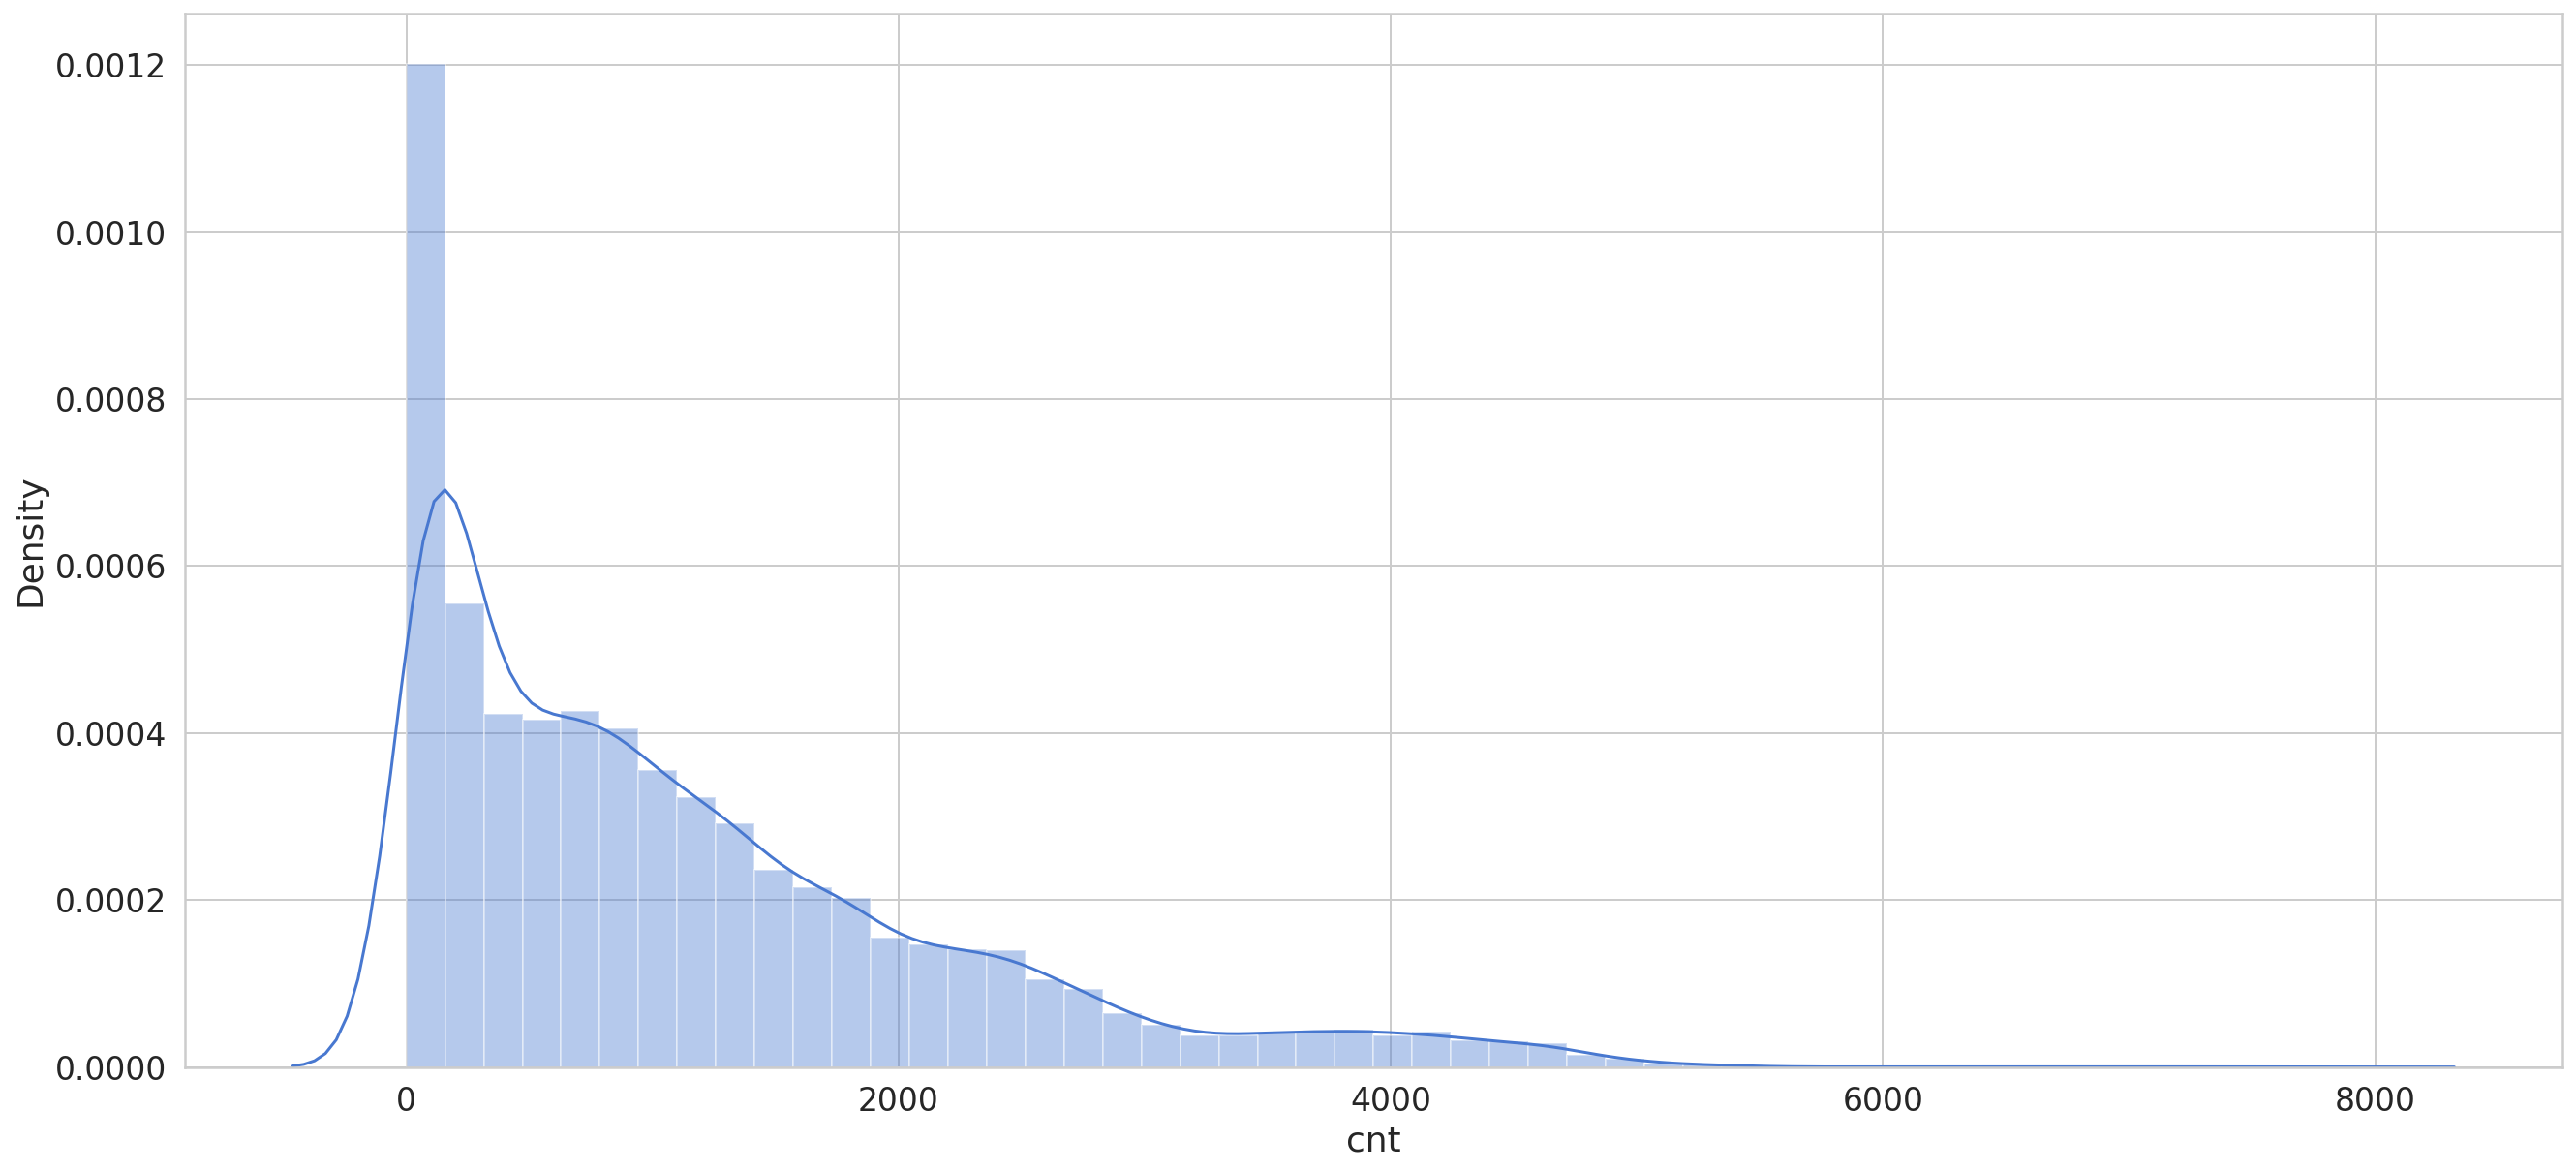

In [ ]:
sns.distplot(df.cnt)

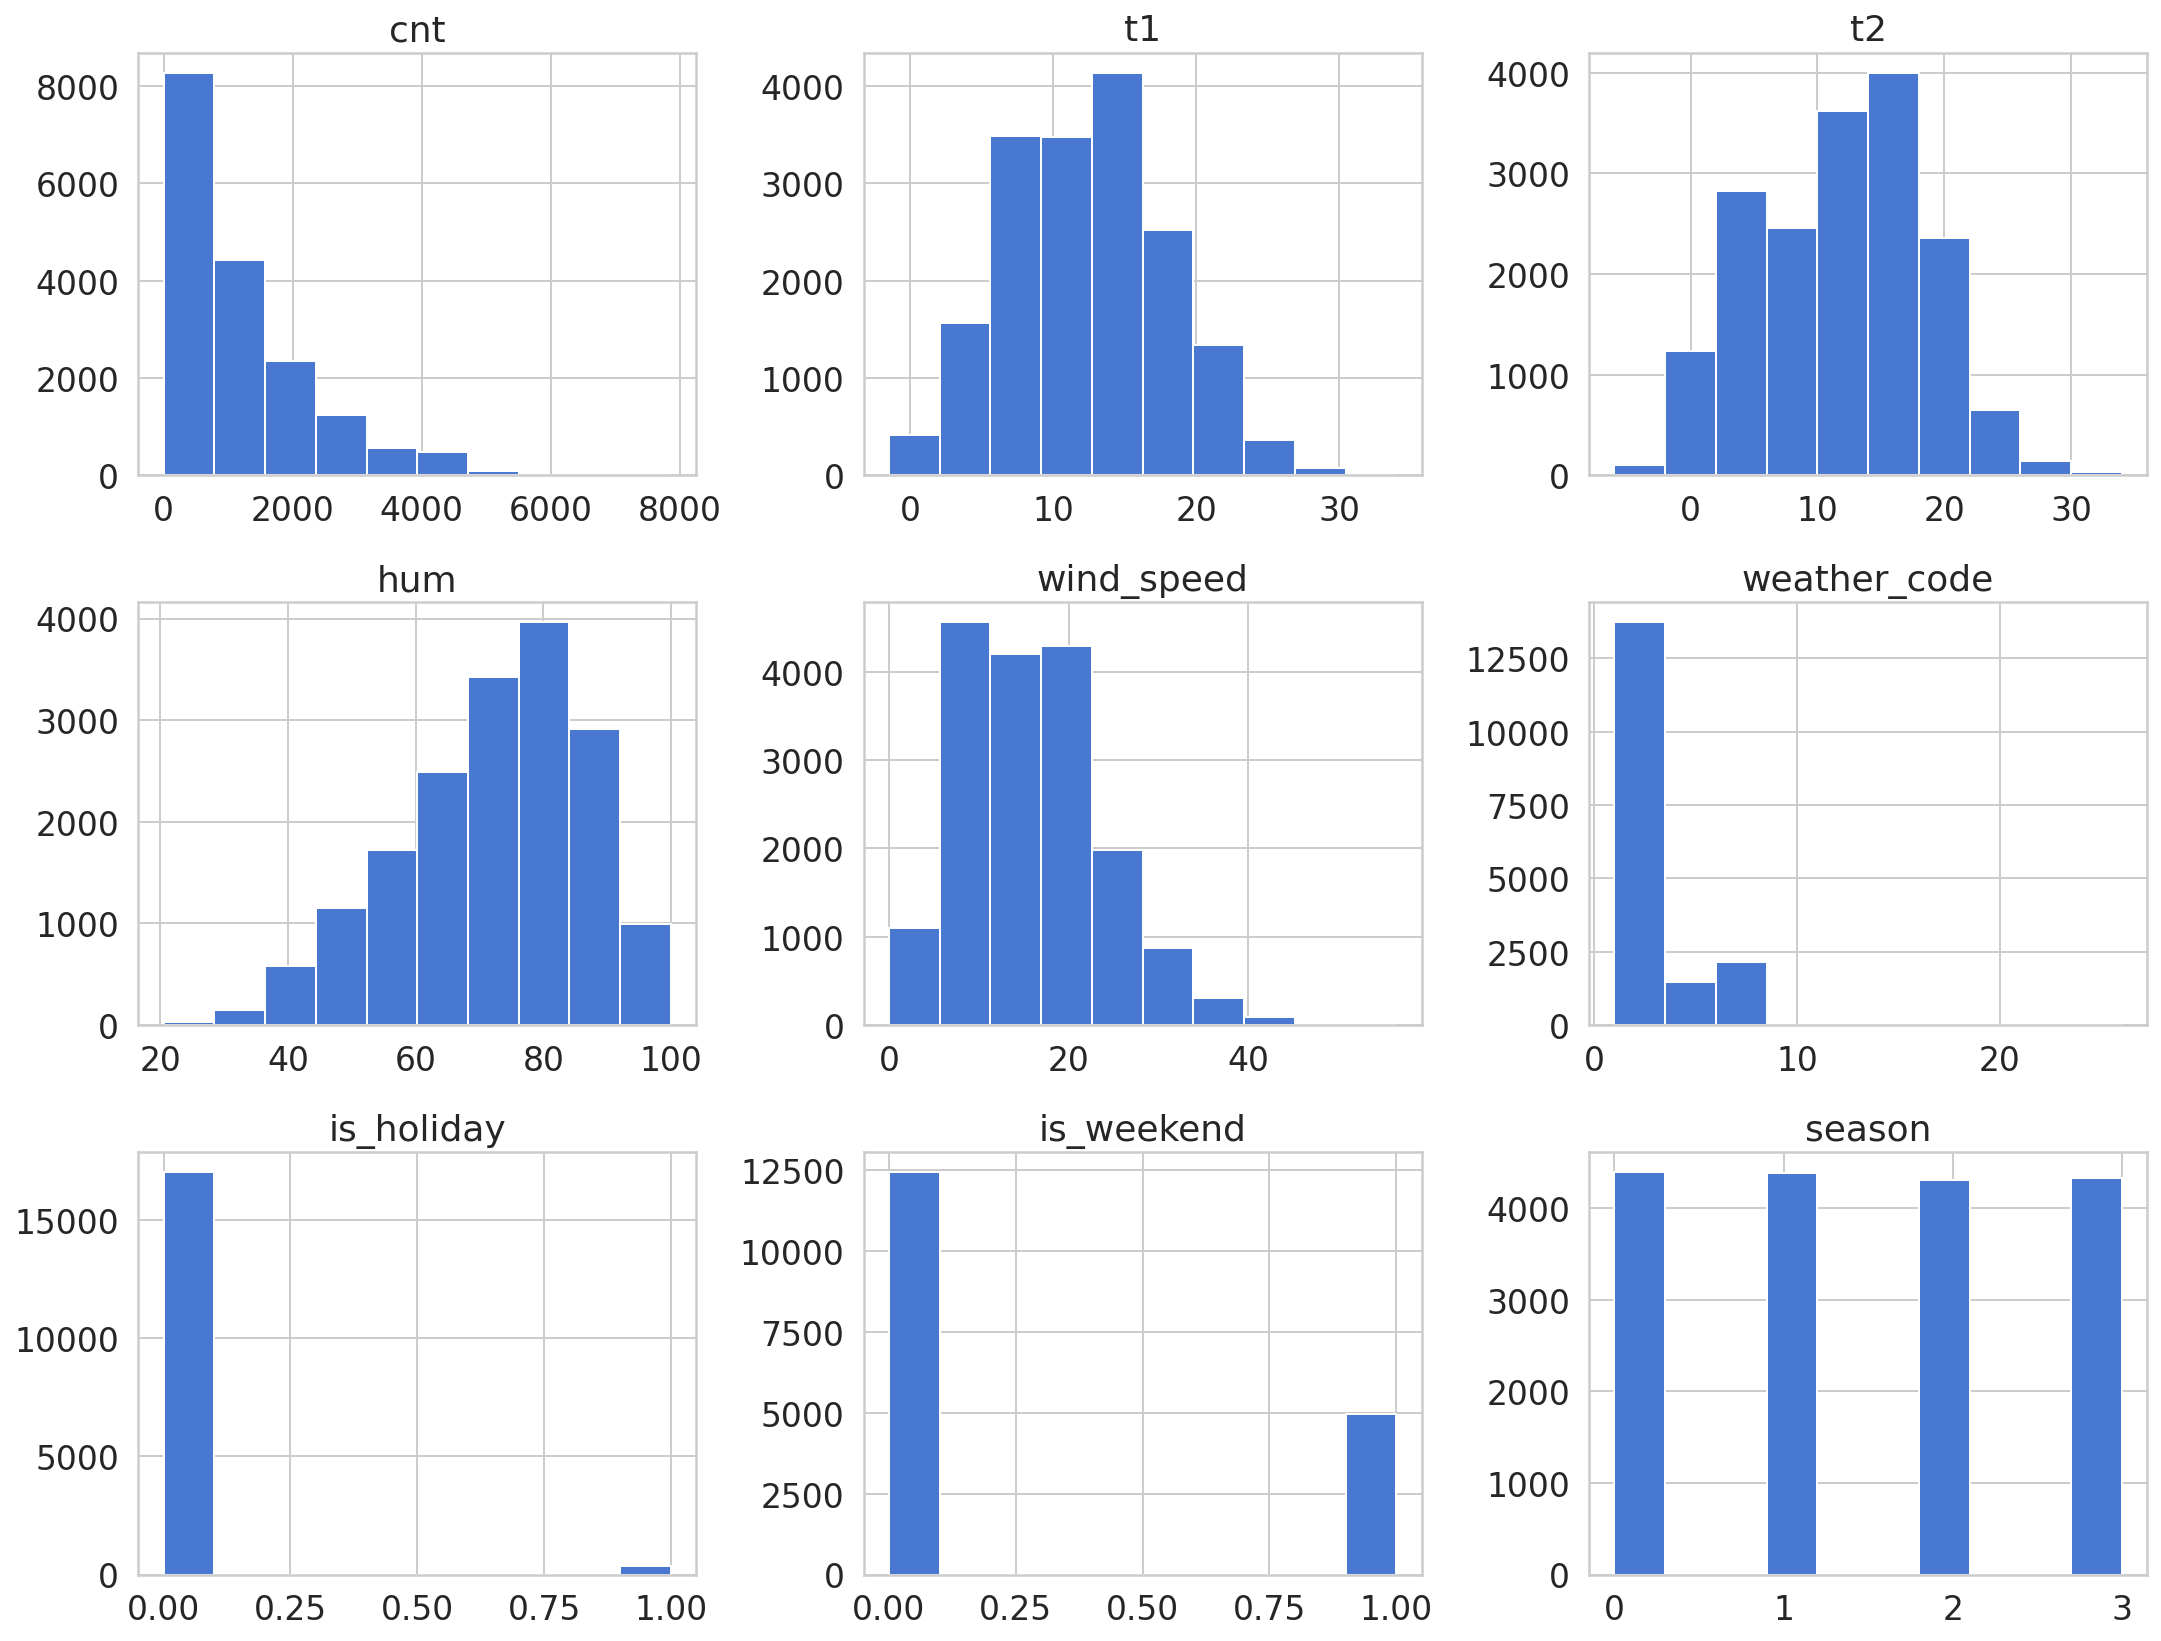

In [ ]:
df.hist(figsize=(18,14))
plt.show()

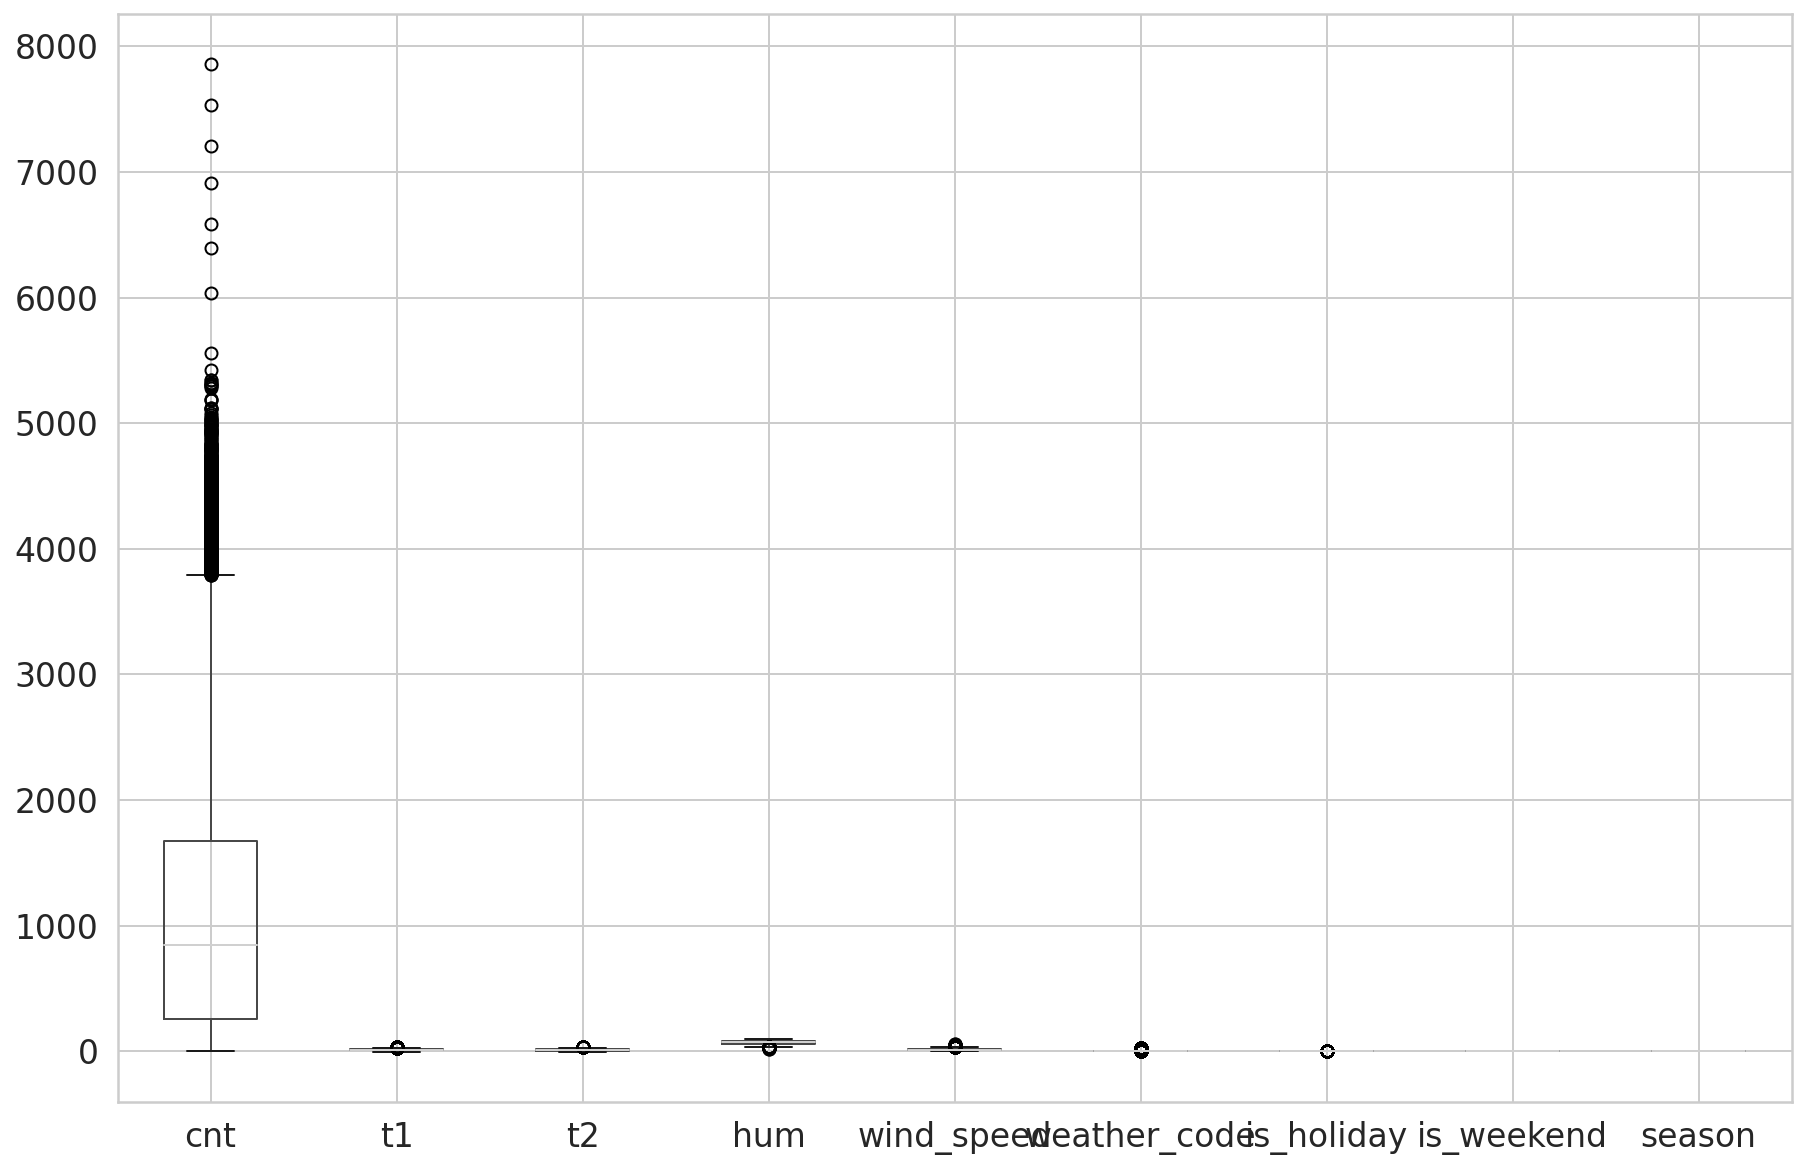

In [ ]:
df.boxplot(figsize=(15,10))

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

In [ ]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

### Check Missing Values and Outliers

In [ ]:
df.isnull().sum()/len(df)*100

cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
hour            0.0
day_of_month    0.0
day_of_week     0.0
month           0.0
dtype: float64

### Plot Breakdowns of Data

In [ ]:
col

{'cnt': 'the count of a new bike shares',
 'hum': 'humidity in percentage',
 'is_holiday': 'boolean field - 1 holiday / 0 non holiday',
 'is_weekend': 'boolean field - 1 if the day is weekend',
 'season': 'category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.',
 't1': 'real temperature in C',
 't2': 'temperature in C “feels like”',
 'timestamp': 'timestamp field for grouping the data',
 'weather_code': 'category of the weather',
 'wind_speed': 'wind speed in km/h'}

In [ ]:
df.head()


cnt   t1   t2  ...  day_of_month  day_of_week  month
timestamp                           ...                                  
2015-01-04 00:00:00  182  3.0  2.0  ...             4            6      1
2015-01-04 01:00:00  138  3.0  2.5  ...             4            6      1
2015-01-04 02:00:00  134  2.5  2.5  ...             4            6      1
2015-01-04 03:00:00   72  2.0  2.0  ...             4            6      1
2015-01-04 04:00:00   47  2.0  0.0  ...             4            6      1

[5 rows x 13 columns]

***i. Plot bike shares over time***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


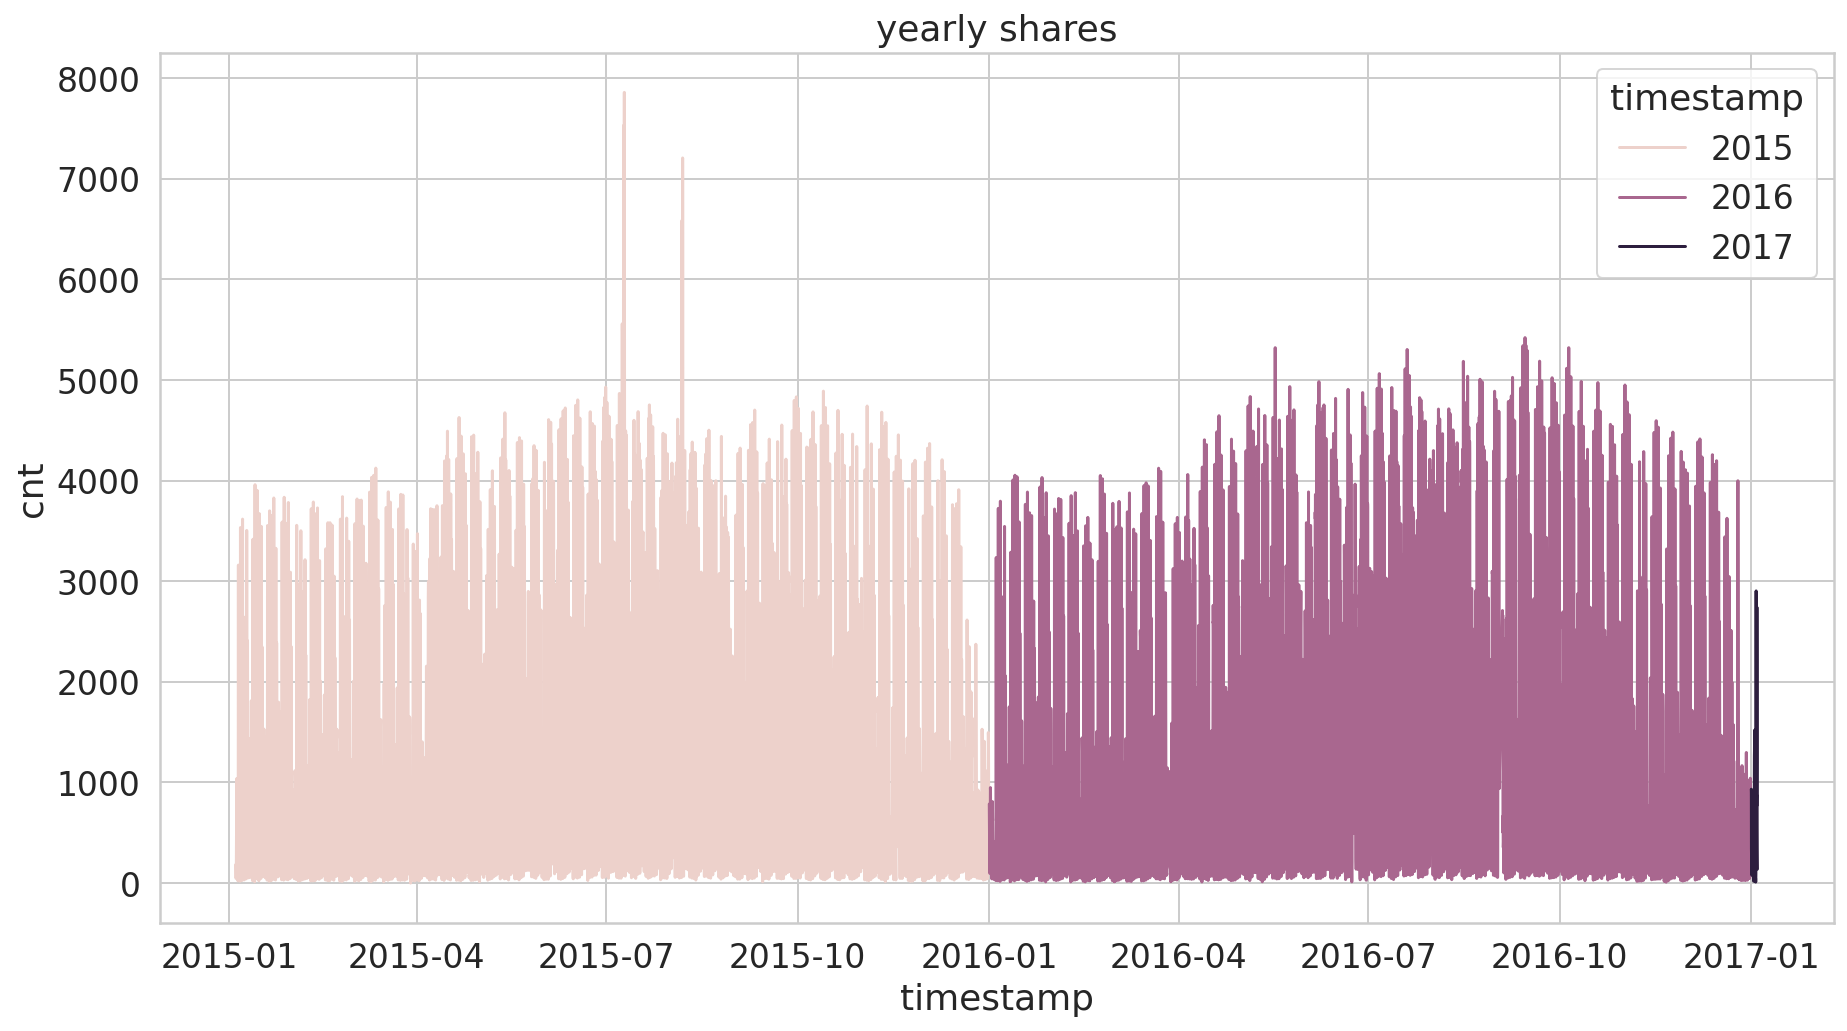

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df.index,'cnt',data=df,hue=df.index.year
             )
plt.title('yearly shares')
plt.show()

***ii. Plot bike shares by months***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


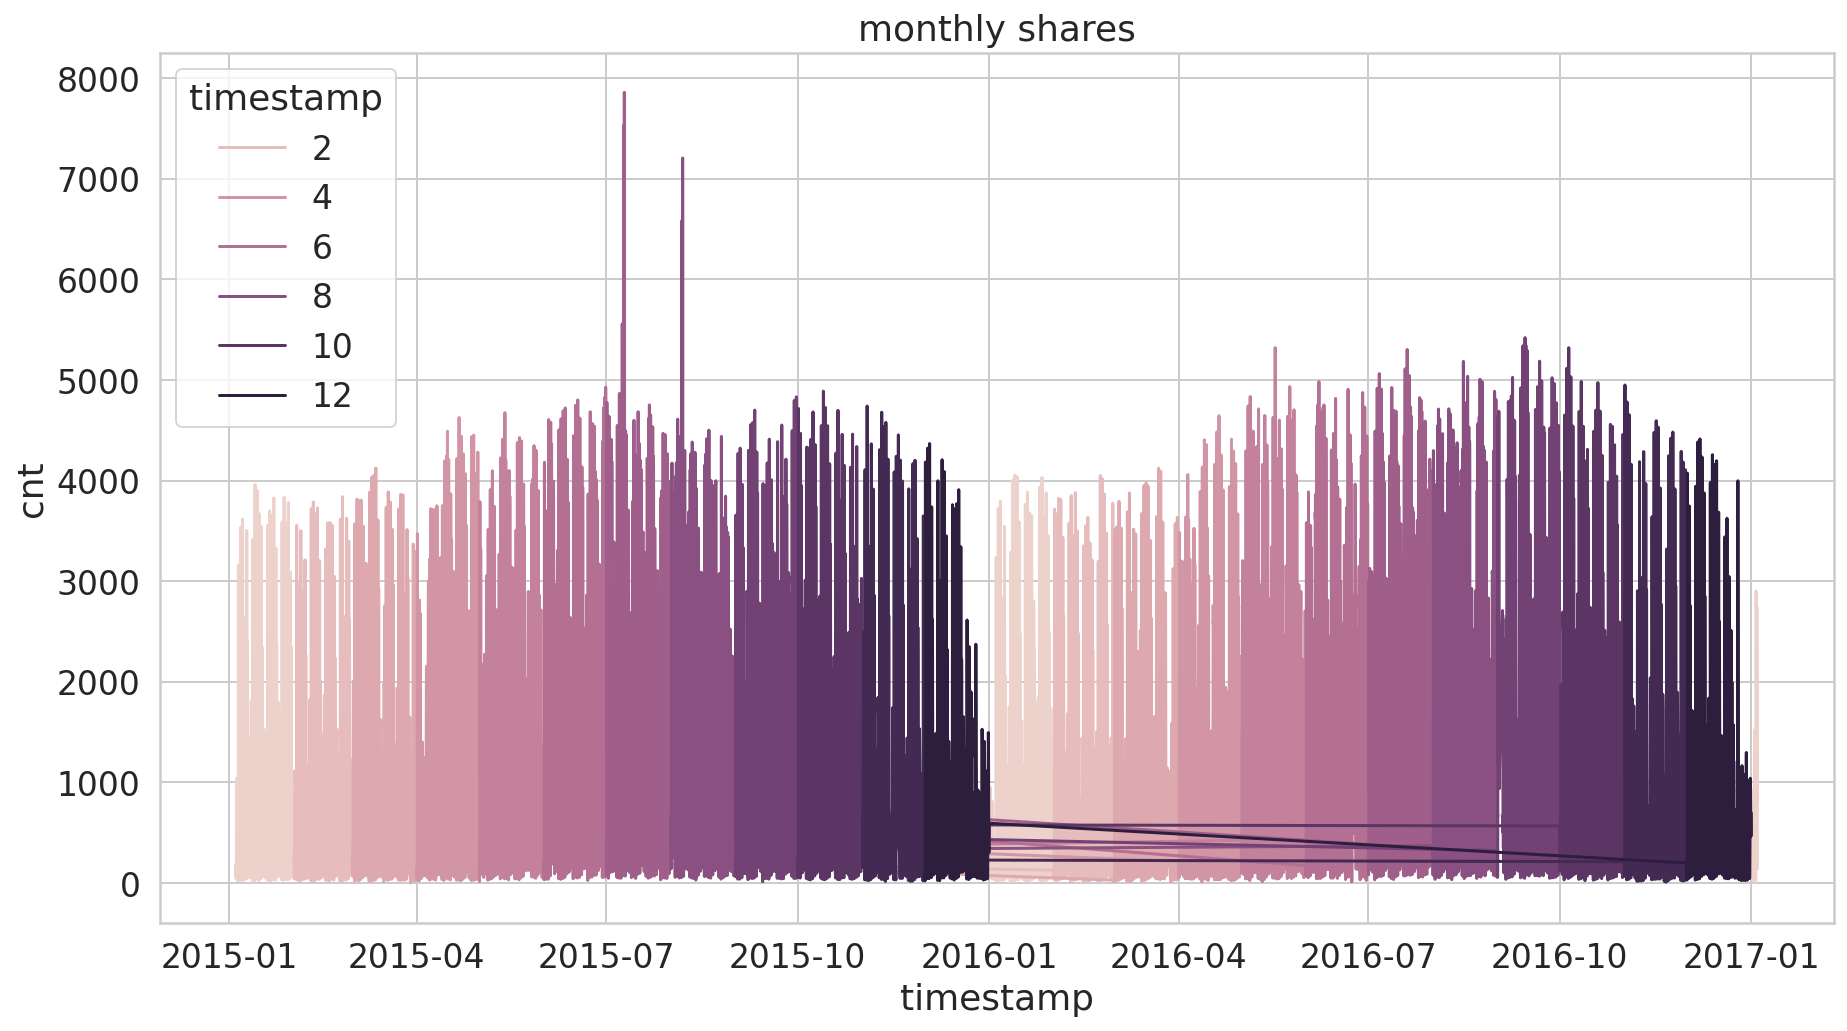

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df.index,'cnt',data=df,hue=df.index.month)
plt.title('monthly shares')
plt.show()

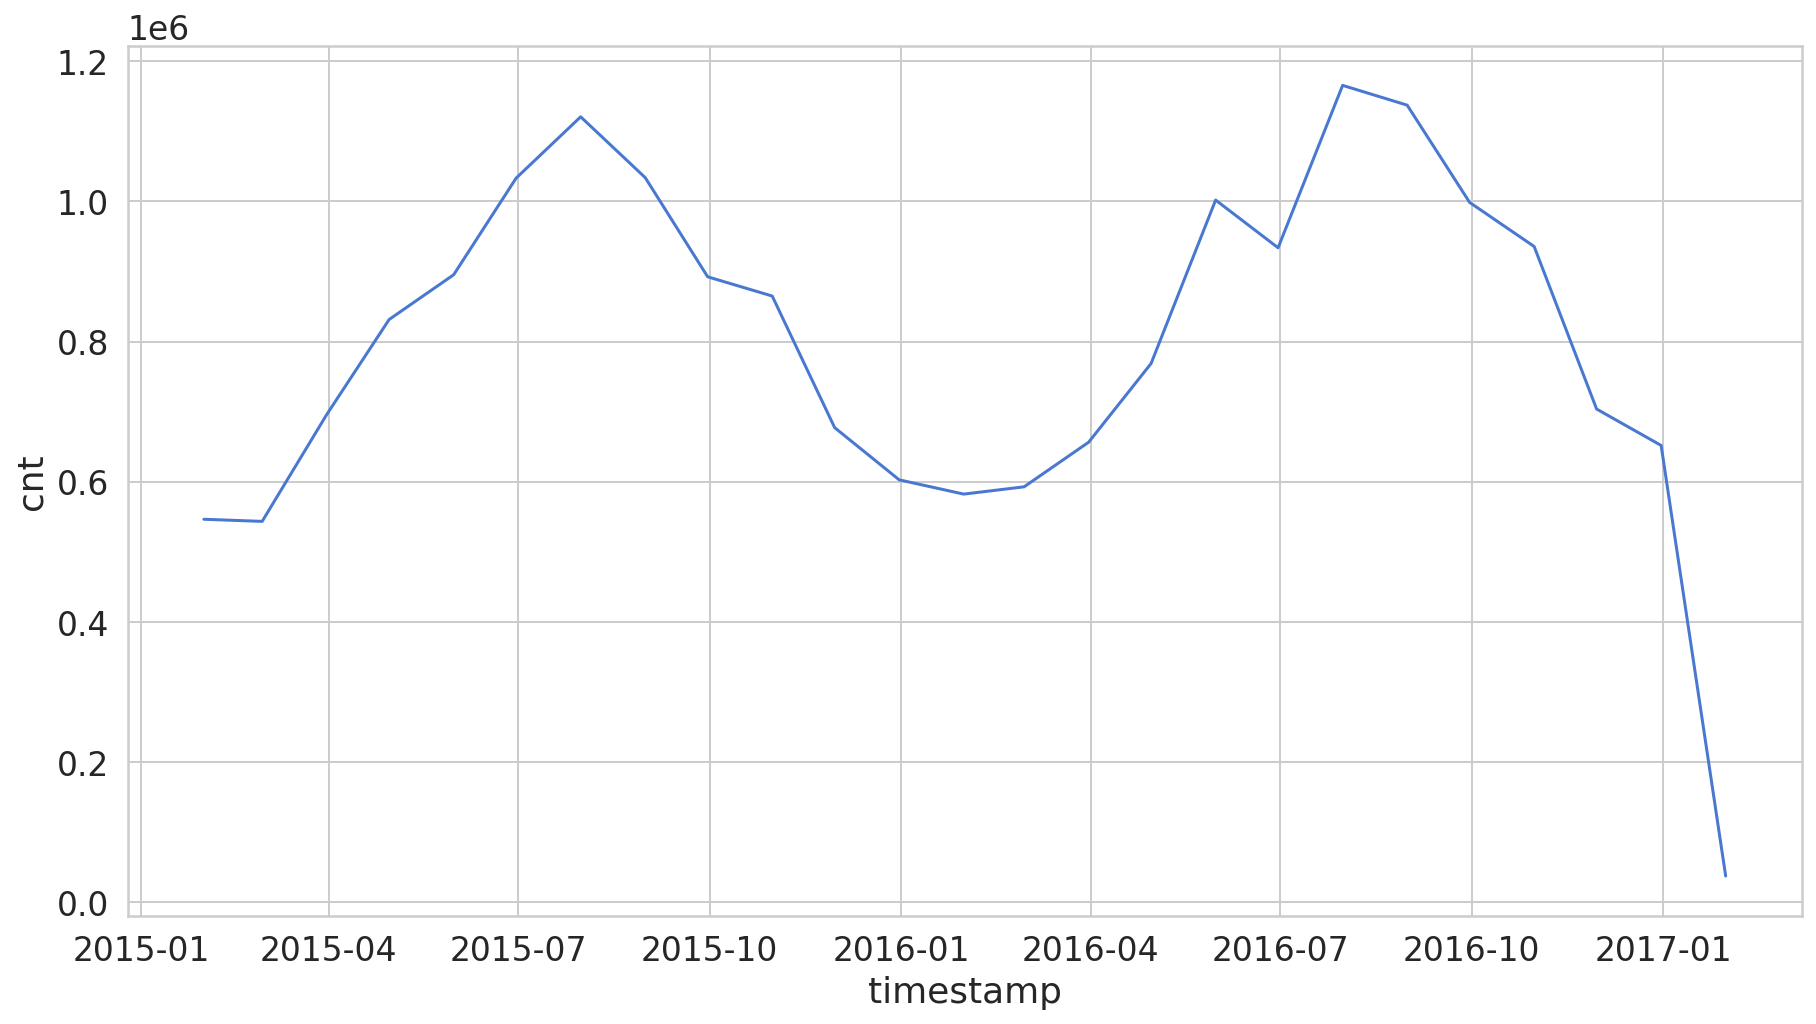

In [ ]:
df_by_month = df.resample('M').sum()
plt.figure(figsize=(15,8))

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


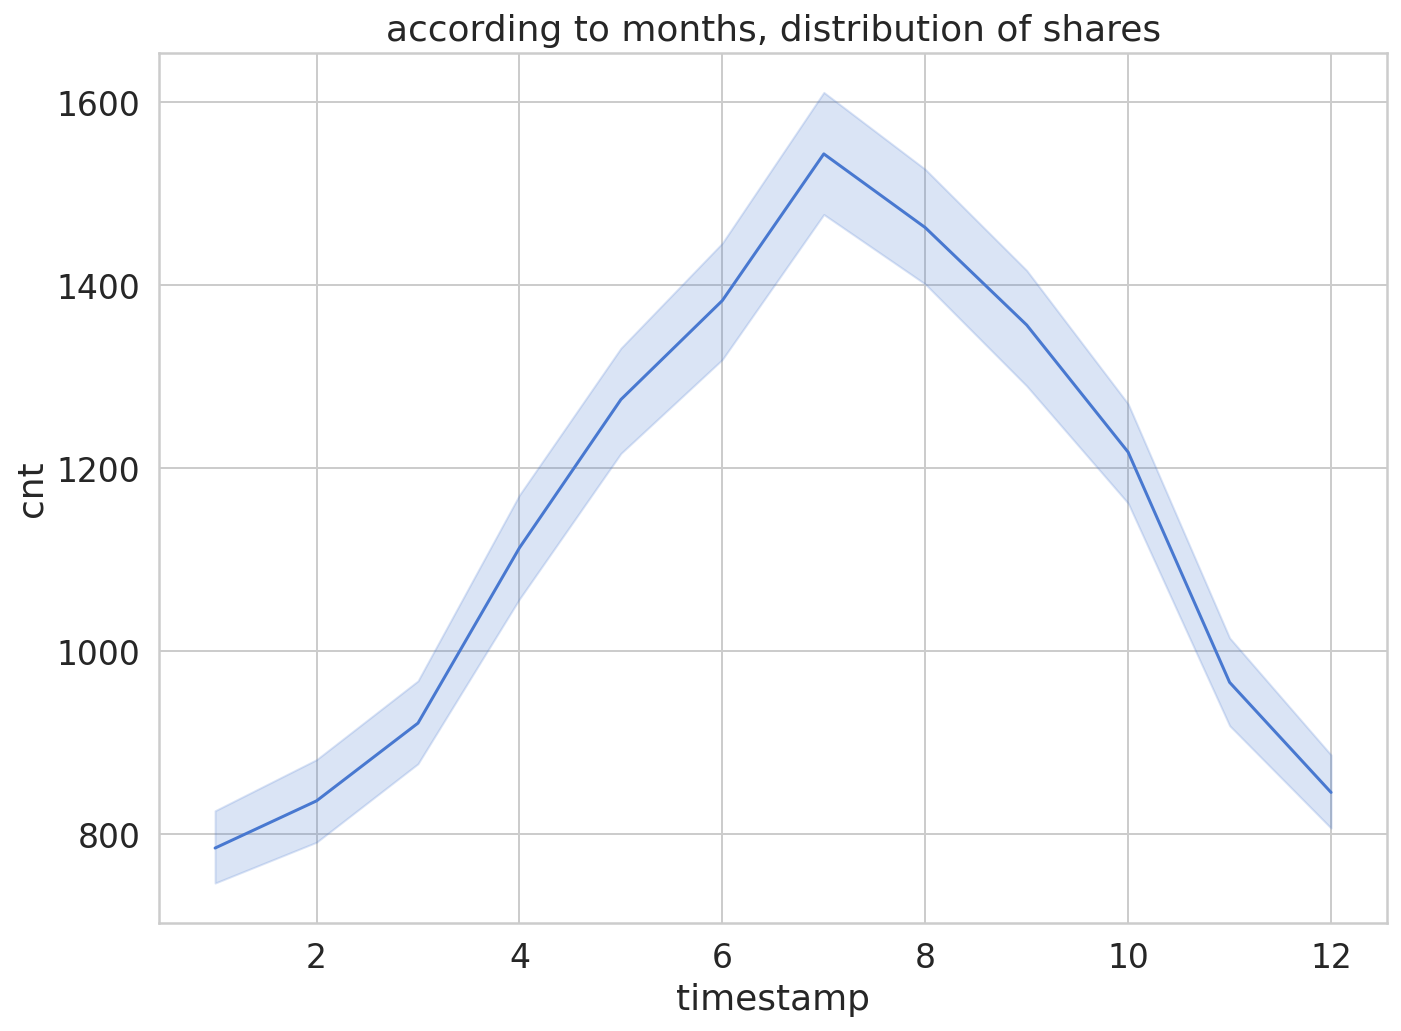

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot(df.index.month,'cnt',data=df)
plt.title('according to months, distribution of shares')
plt.show()

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


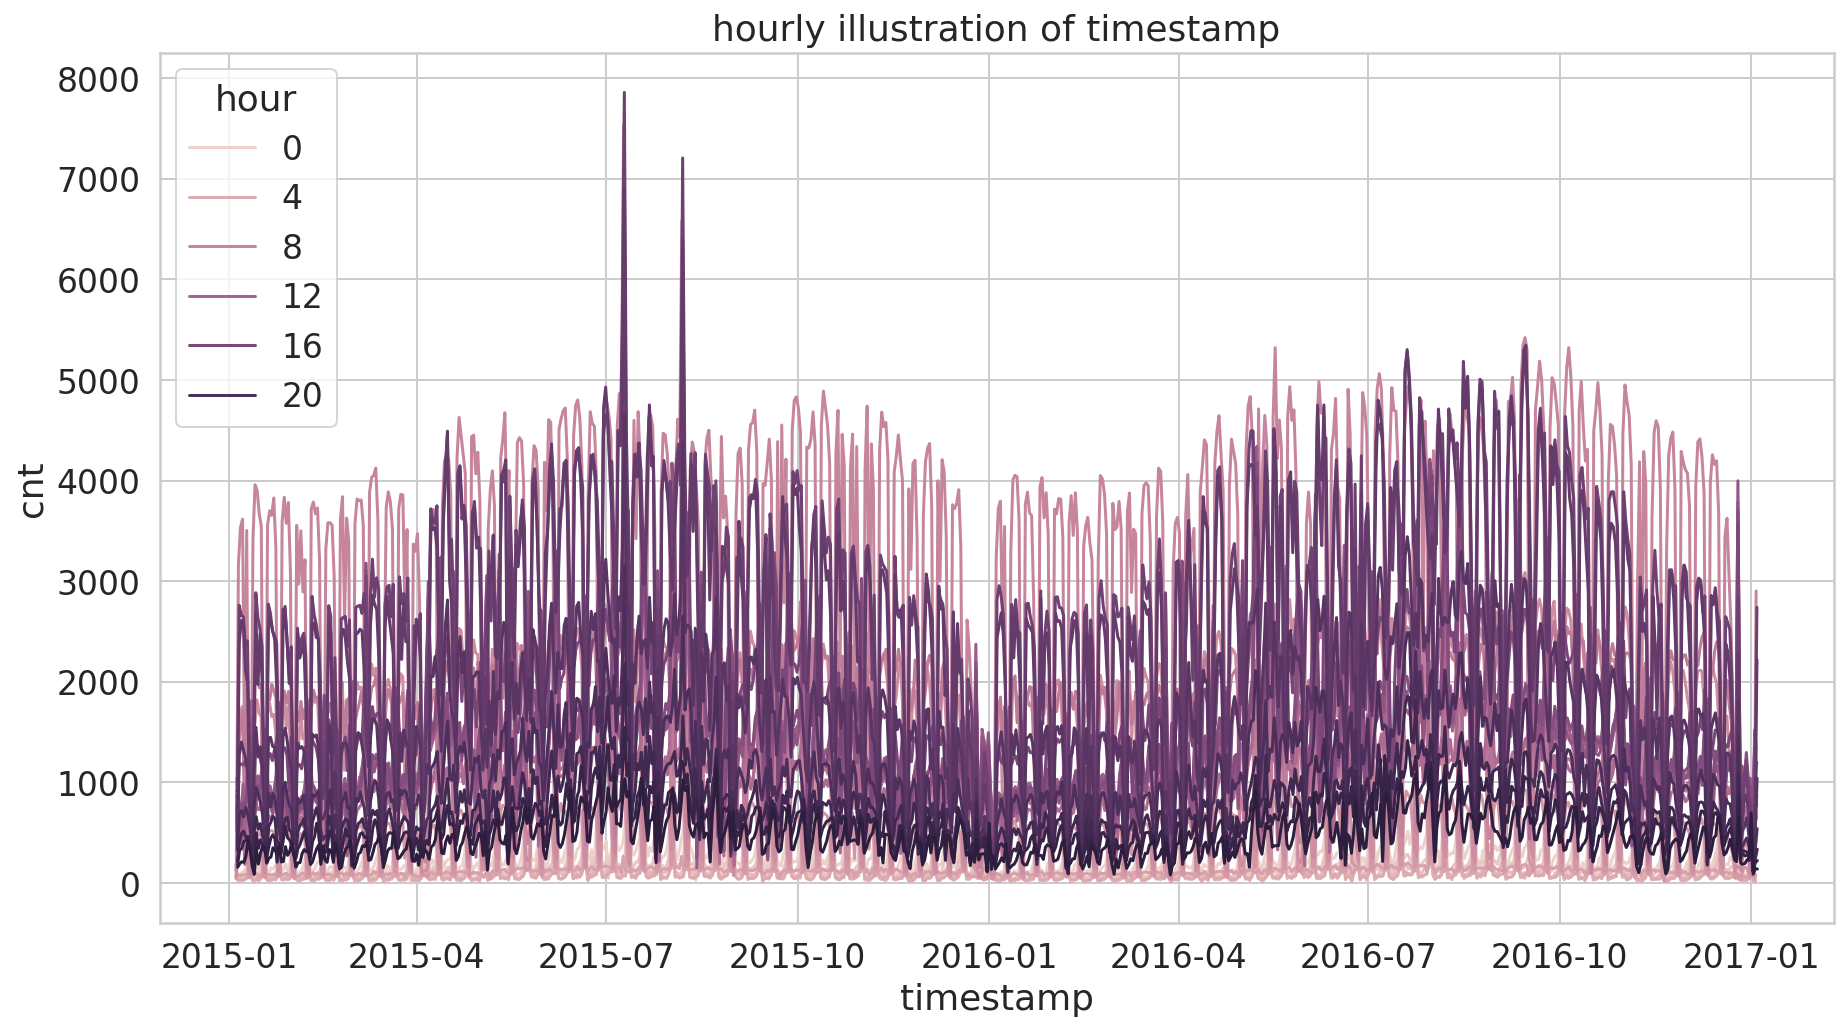

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(df.index,'cnt',data=df, hue='hour')
plt.title('hourly illustration of timestamp')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


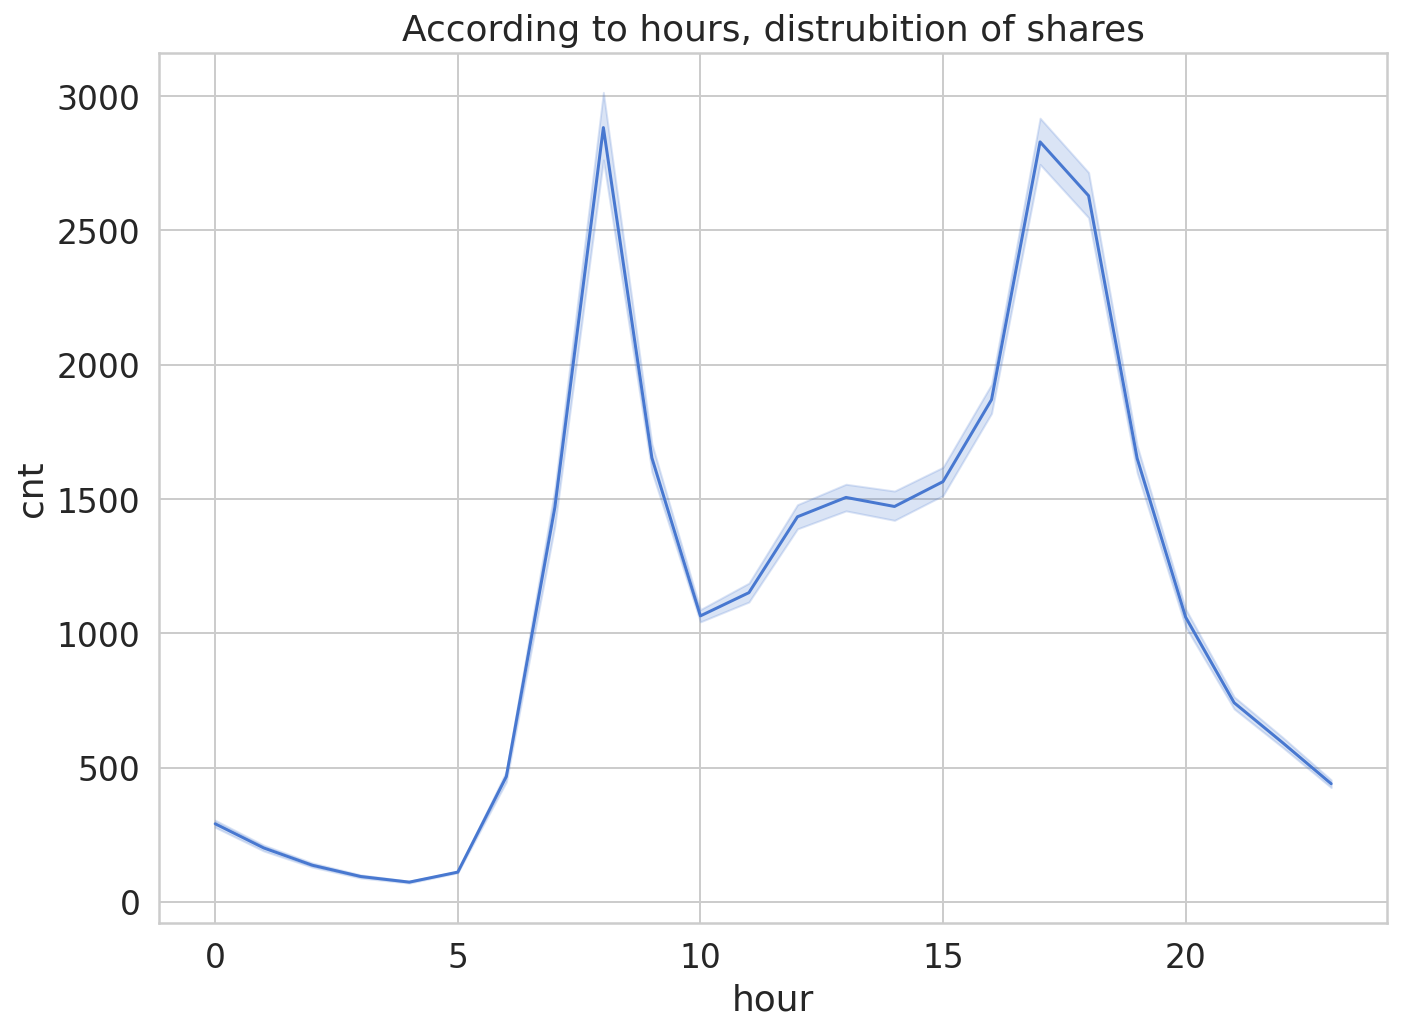

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df)
plt.title('According to hours, distrubition of shares')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


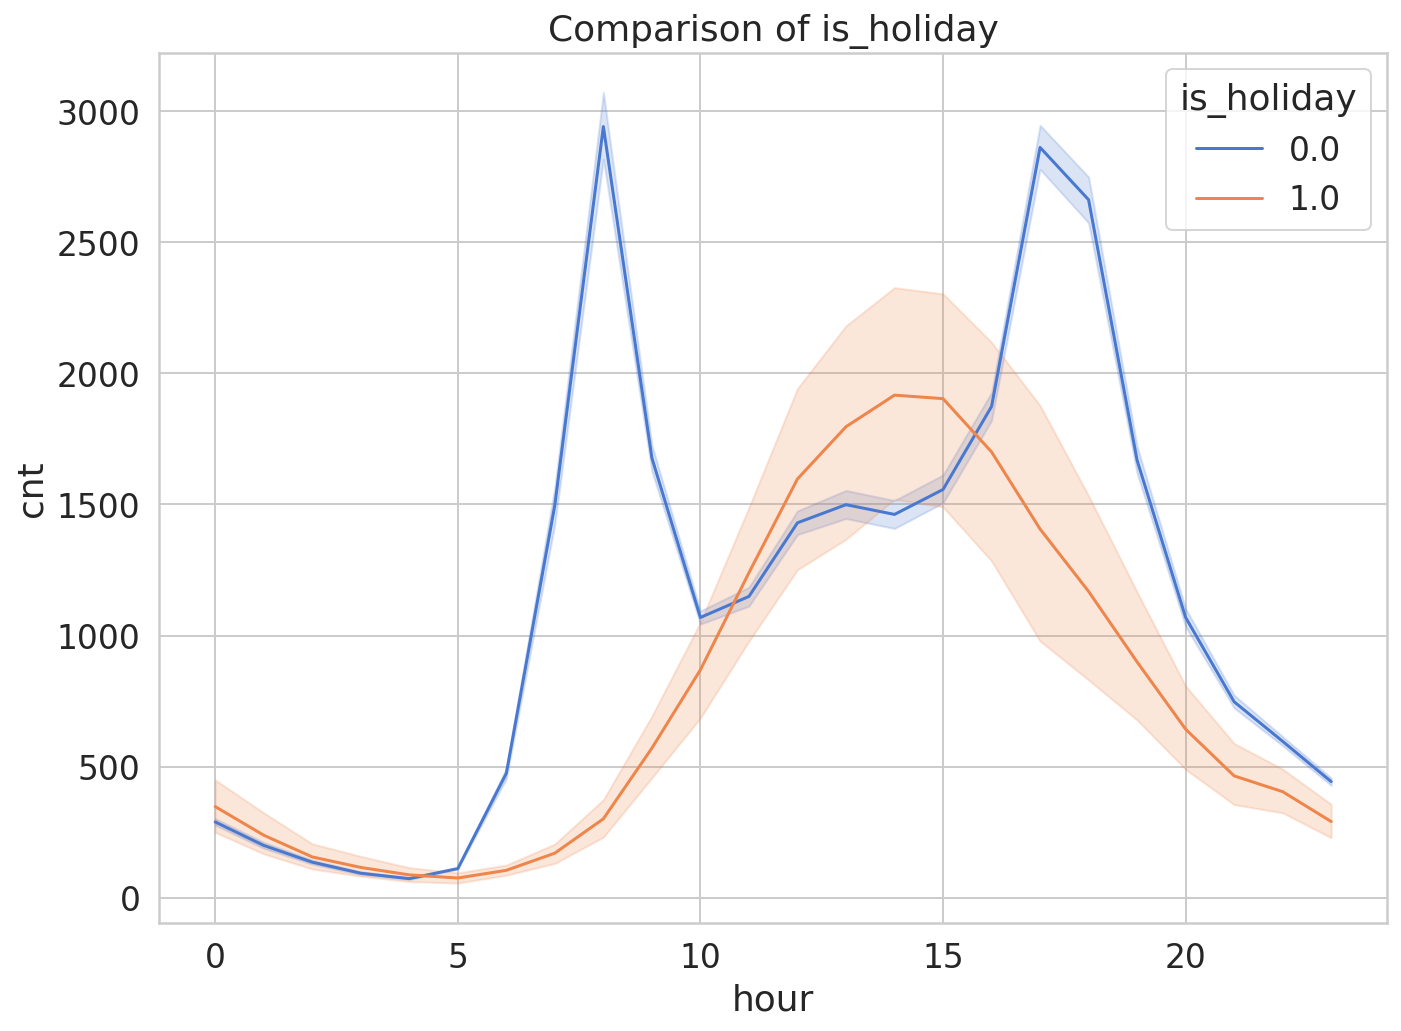

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df,hue='is_holiday')
plt.title('Comparison of is_holiday')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


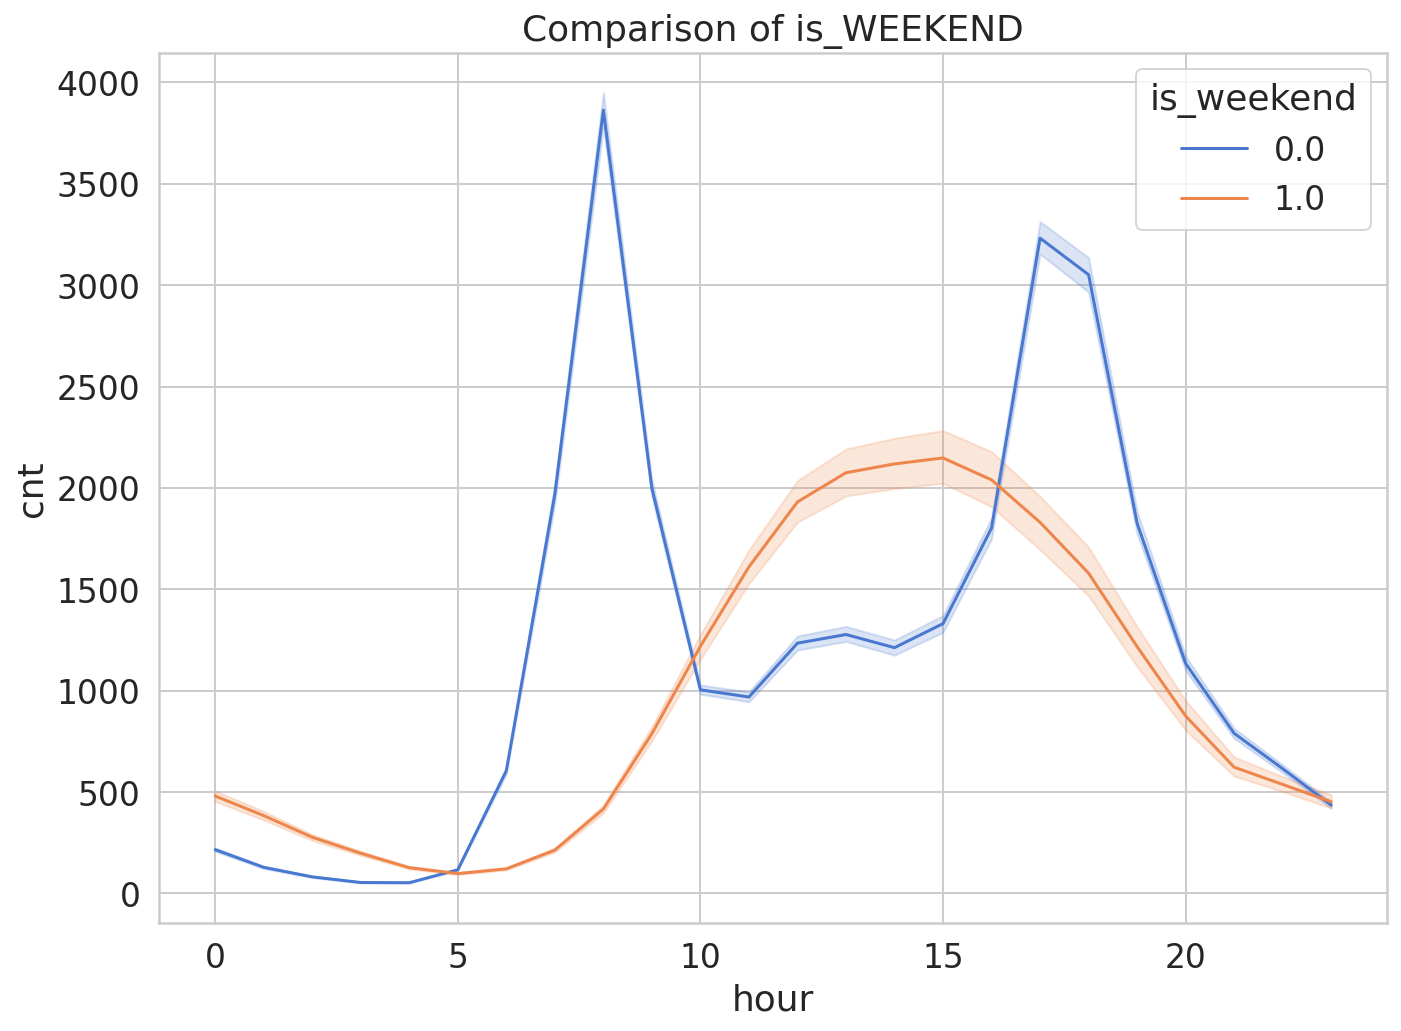

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df,hue='is_weekend')
plt.title('Comparison of is_WEEKEND')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


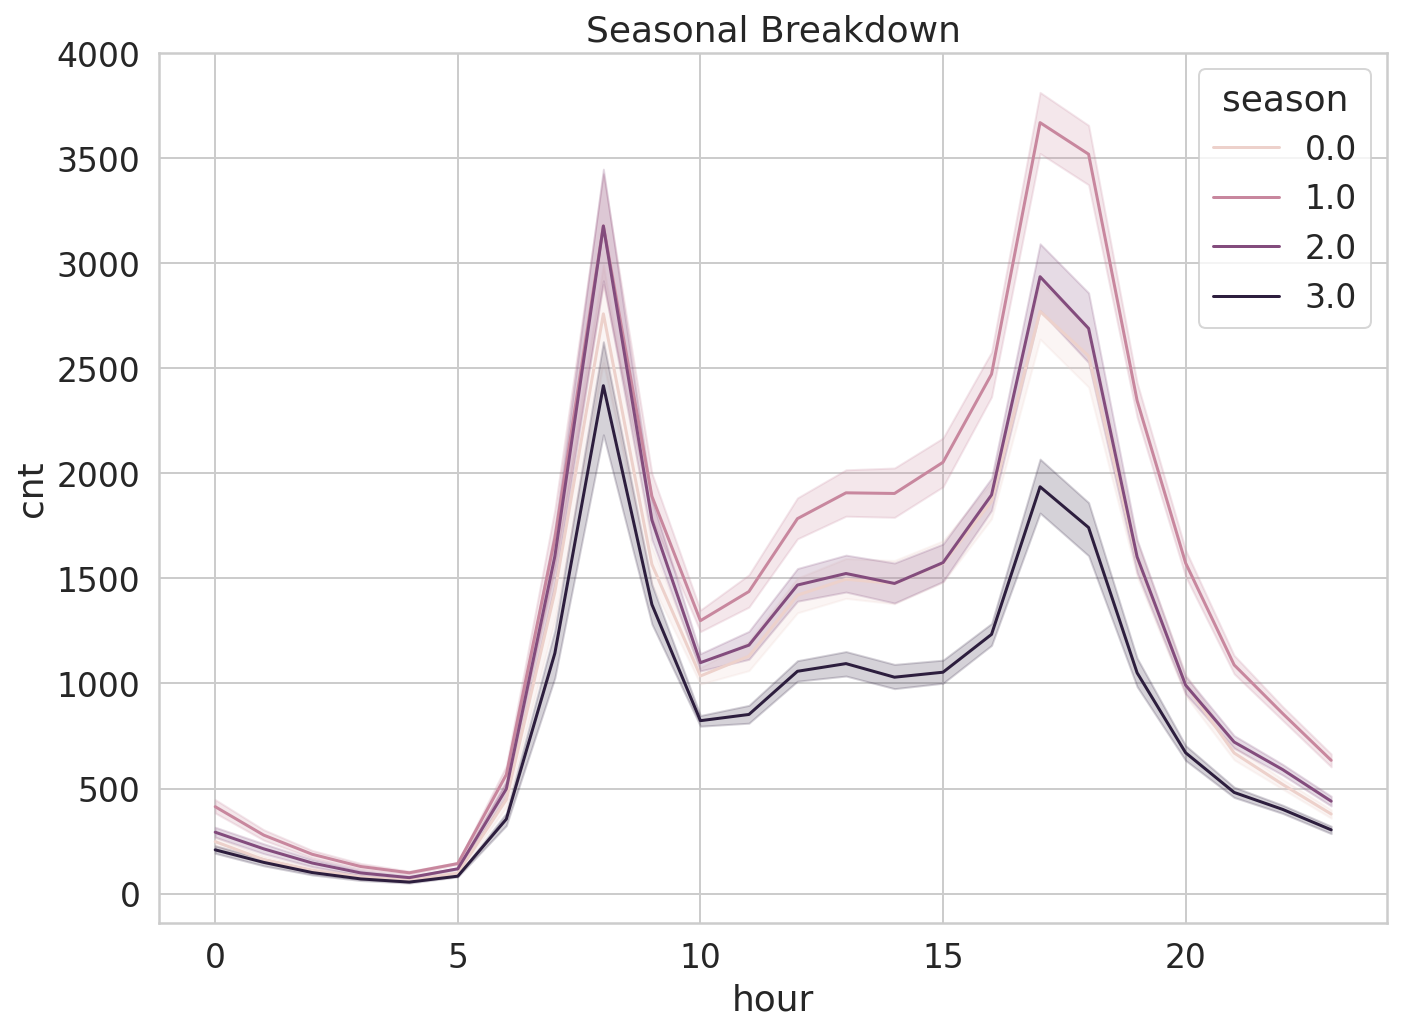

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot('hour','cnt',data=df,hue='season')
plt.title('Seasonal Breakdown')
plt.show()

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


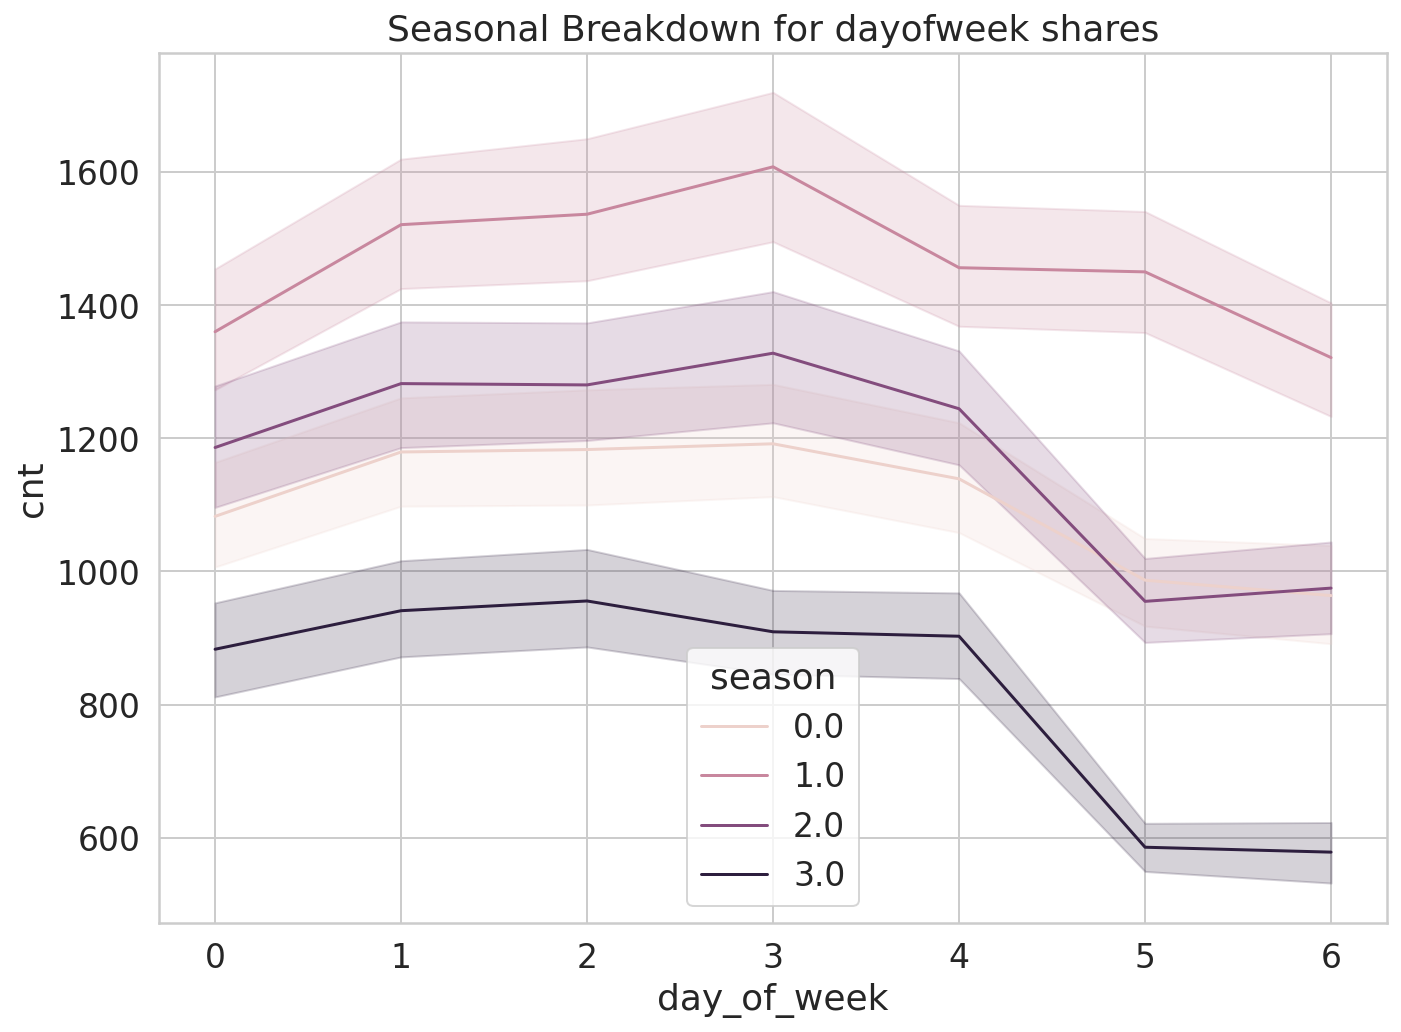

In [ ]:
plt.figure(figsize=(11,8))
sns.lineplot('day_of_week','cnt',data=df,hue='season')
plt.title('Seasonal Breakdown for dayofweek shares')
plt.show()

***v. Plot the distribution of bike shares on holidays by seasons***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


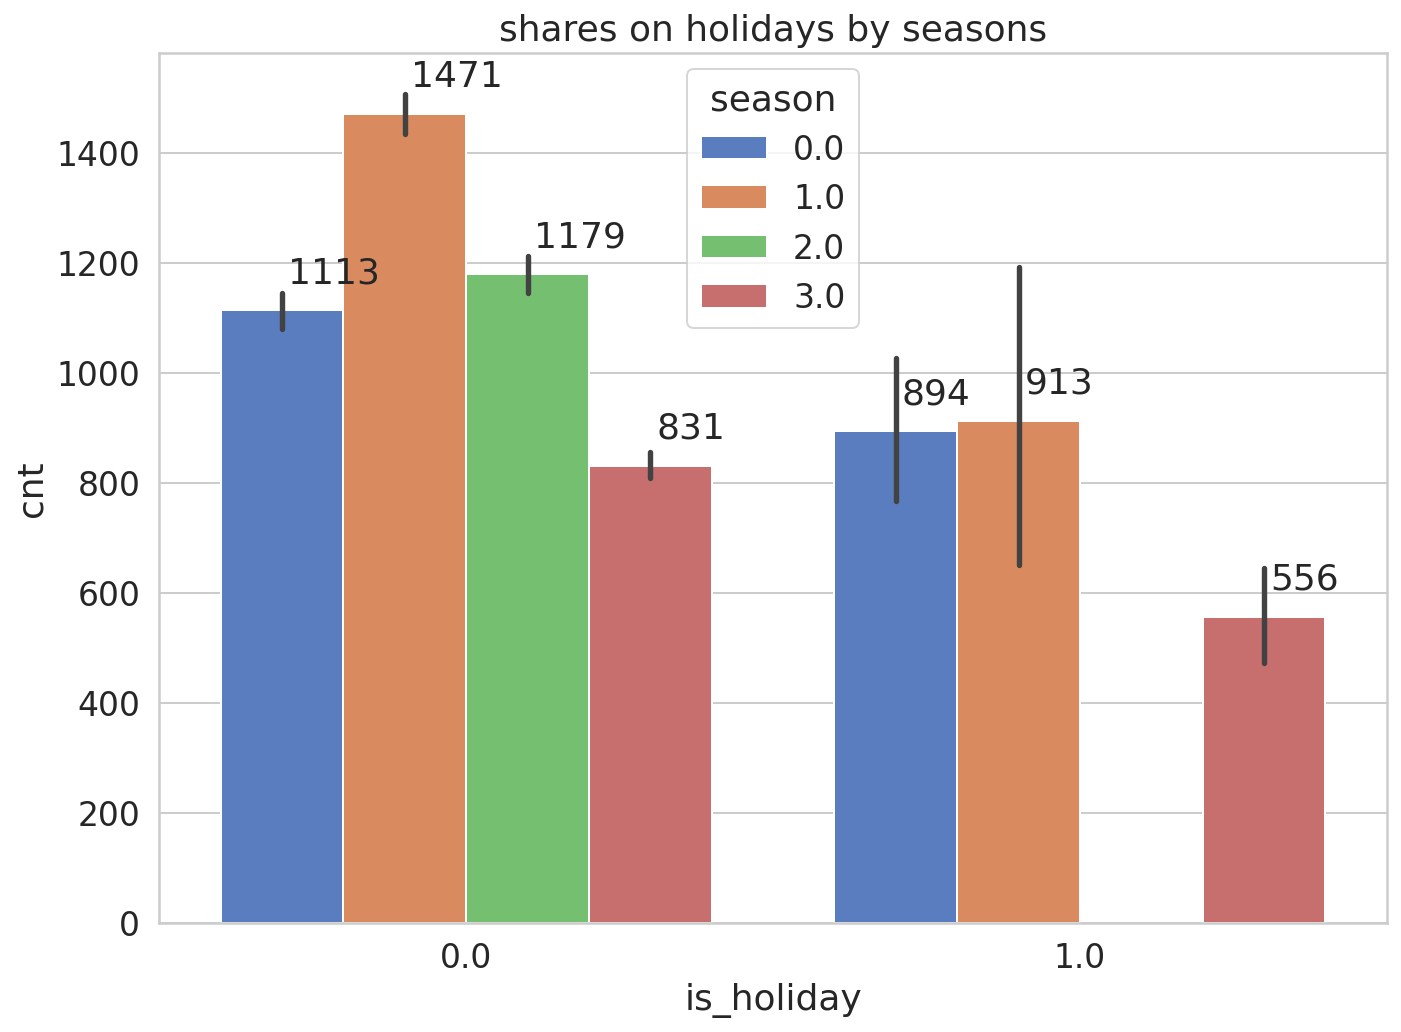

In [ ]:
plt.figure(figsize=(11,8))
ax = sns.barplot('is_holiday','cnt', data=df,hue='season')
plt.title('shares on holidays by seasons')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+50))
plt.show()

In [ ]:
df.head()

cnt   t1   t2  ...  day_of_month  day_of_week  month
timestamp                           ...                                  
2015-01-04 00:00:00  182  3.0  2.0  ...             4            6      1
2015-01-04 01:00:00  138  3.0  2.5  ...             4            6      1
2015-01-04 02:00:00  134  2.5  2.5  ...             4            6      1
2015-01-04 03:00:00   72  2.0  2.0  ...             4            6      1
2015-01-04 04:00:00   47  2.0  0.0  ...             4            6      1

[5 rows x 13 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'shares on weather by seasons')

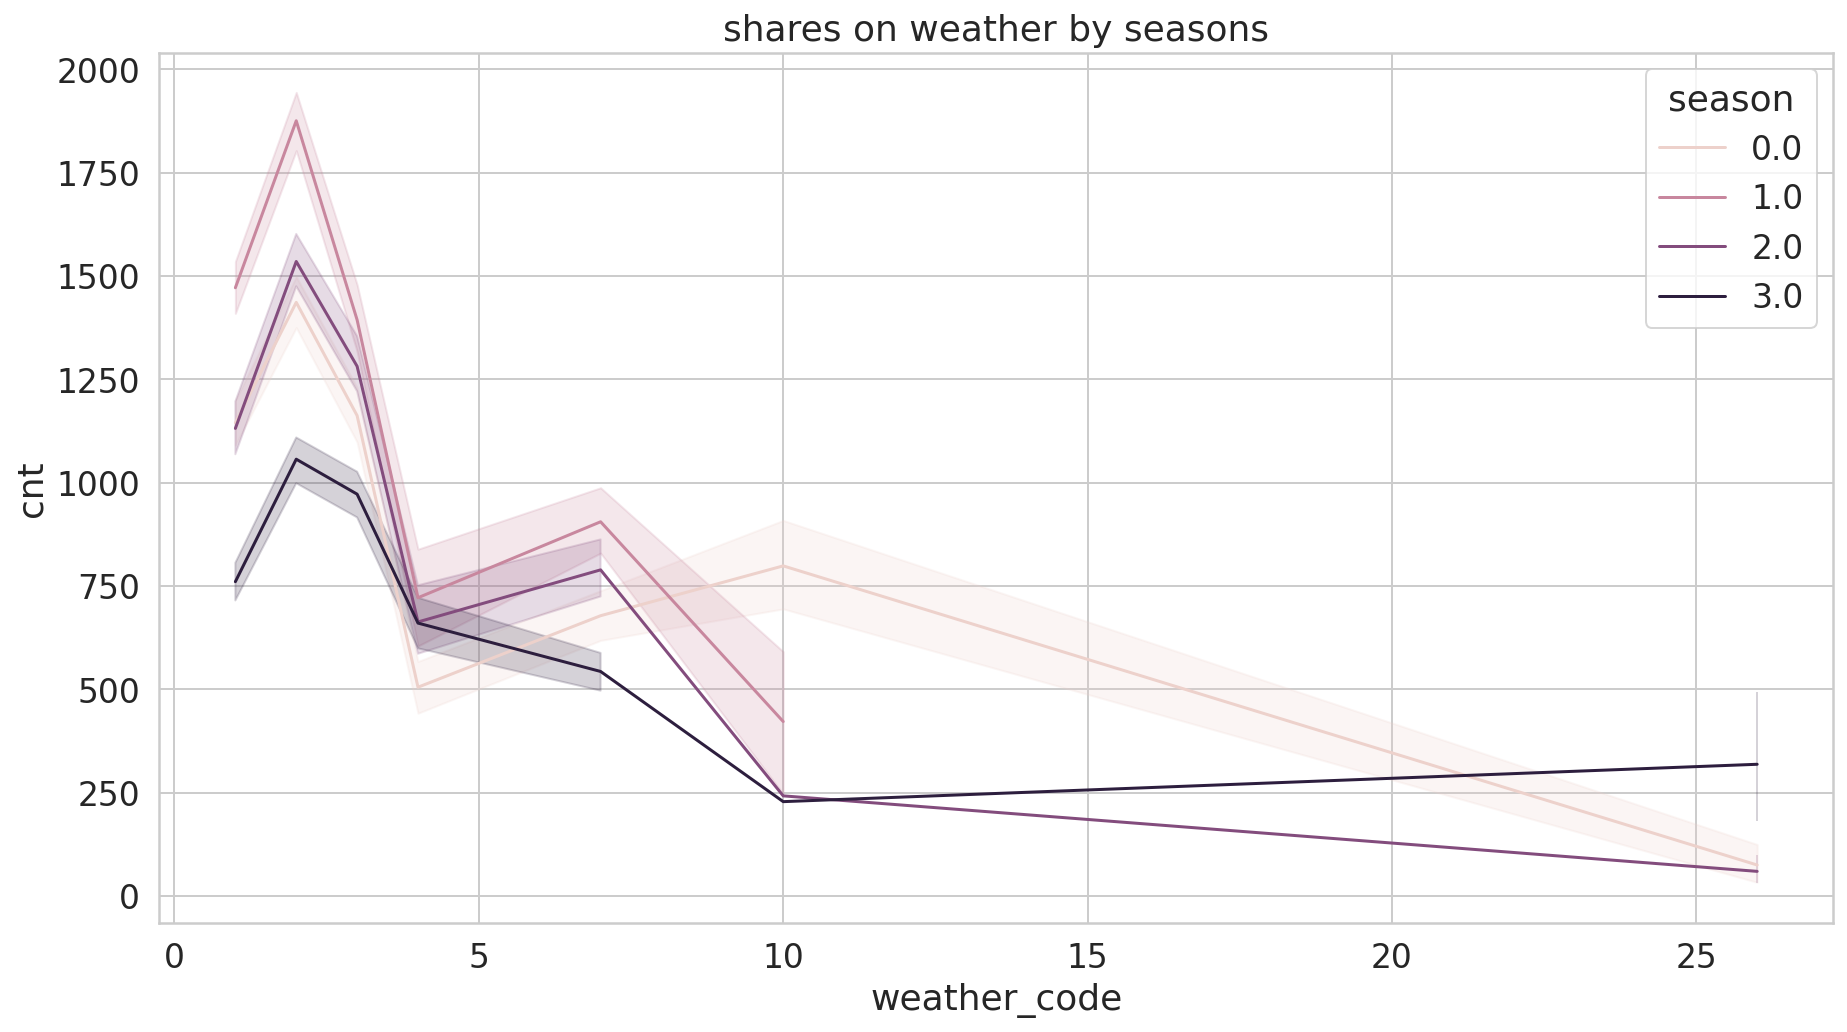

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.lineplot('weather_code','cnt', data=df,hue='season')
plt.title('shares on weather by seasons')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'shares on humidity by seasons')

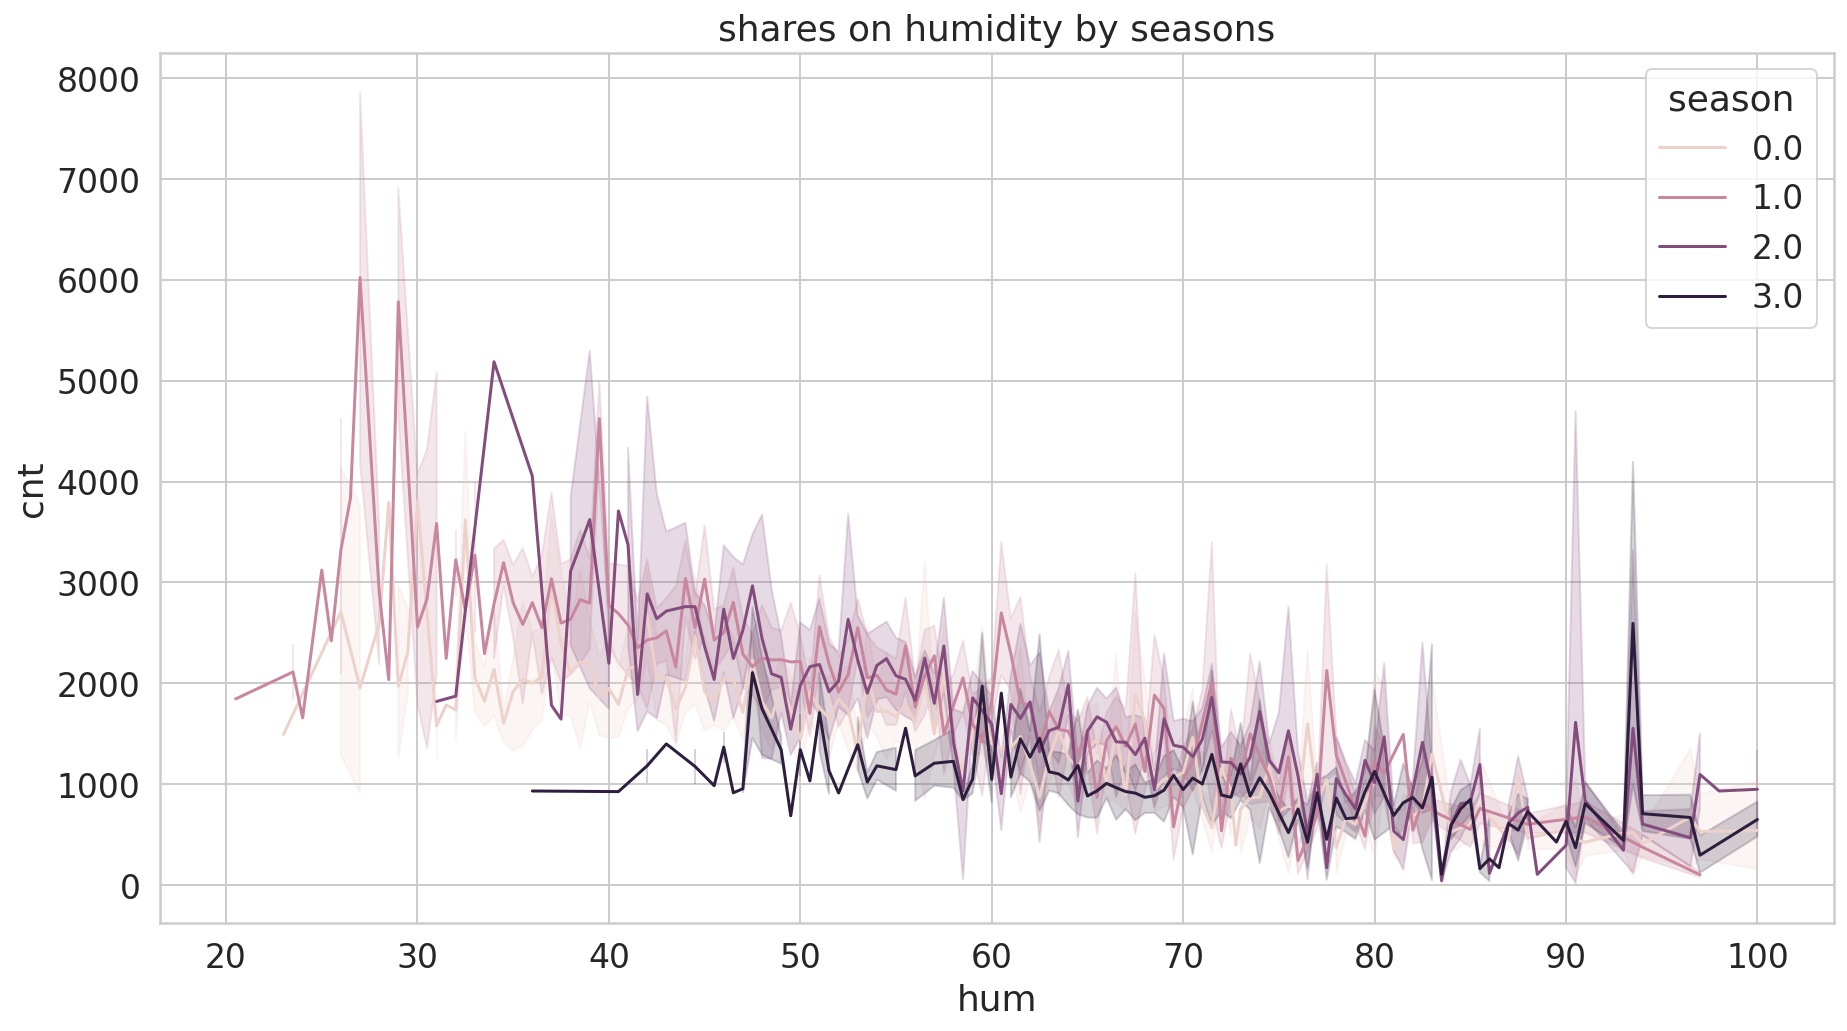

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.lineplot('hum','cnt', data=df,hue='season')
plt.title('shares on humidity by seasons')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'shares on humidity by seasons')

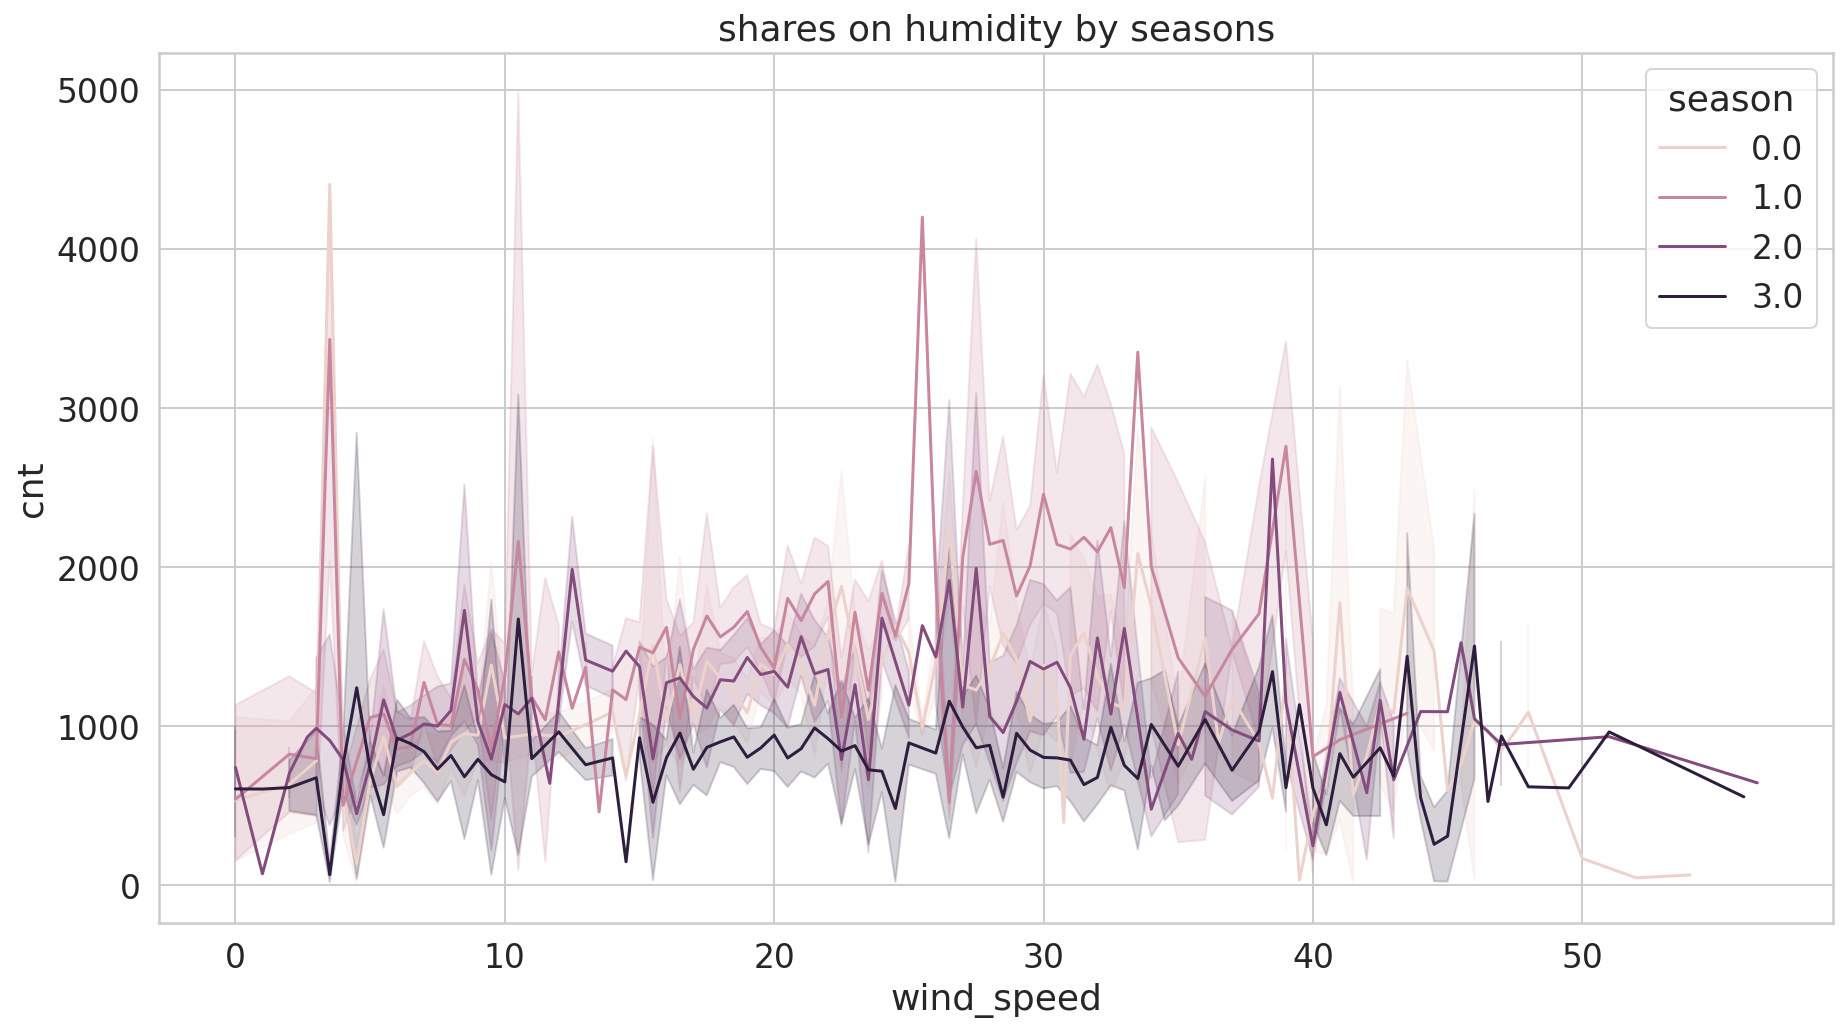

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.lineplot('wind_speed','cnt', data=df,hue='season')
plt.title('shares on humidity by seasons')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


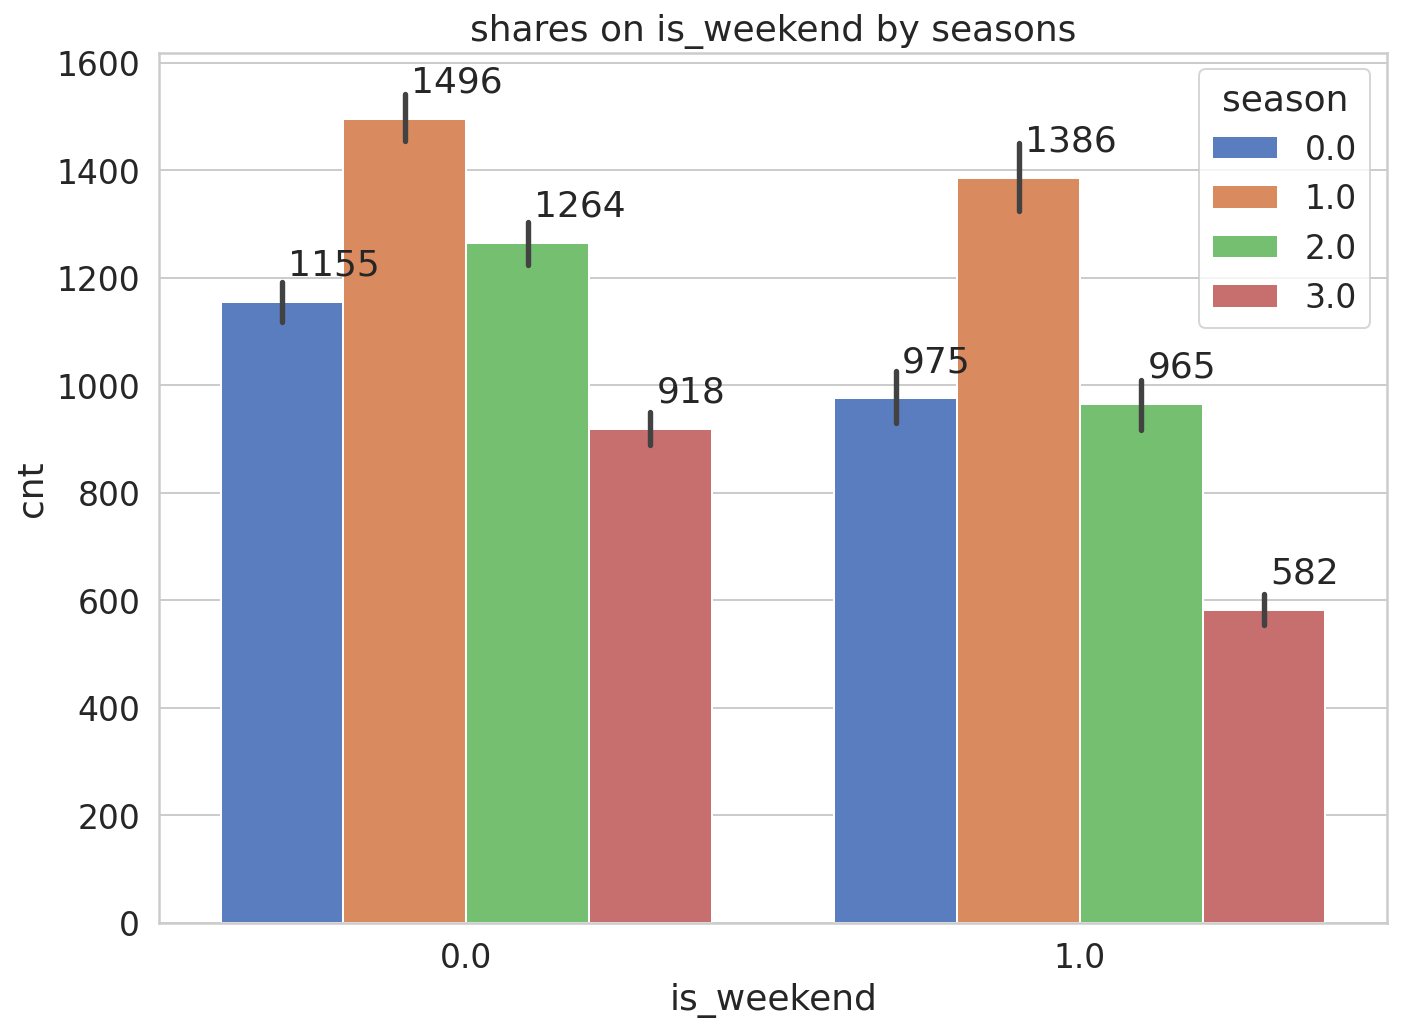

In [ ]:
plt.figure(figsize=(11,8))
ax = sns.barplot('is_weekend','cnt', data=df,hue='season')
plt.title('shares on is_weekend by seasons')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.11, p.get_height()+50))
plt.show()

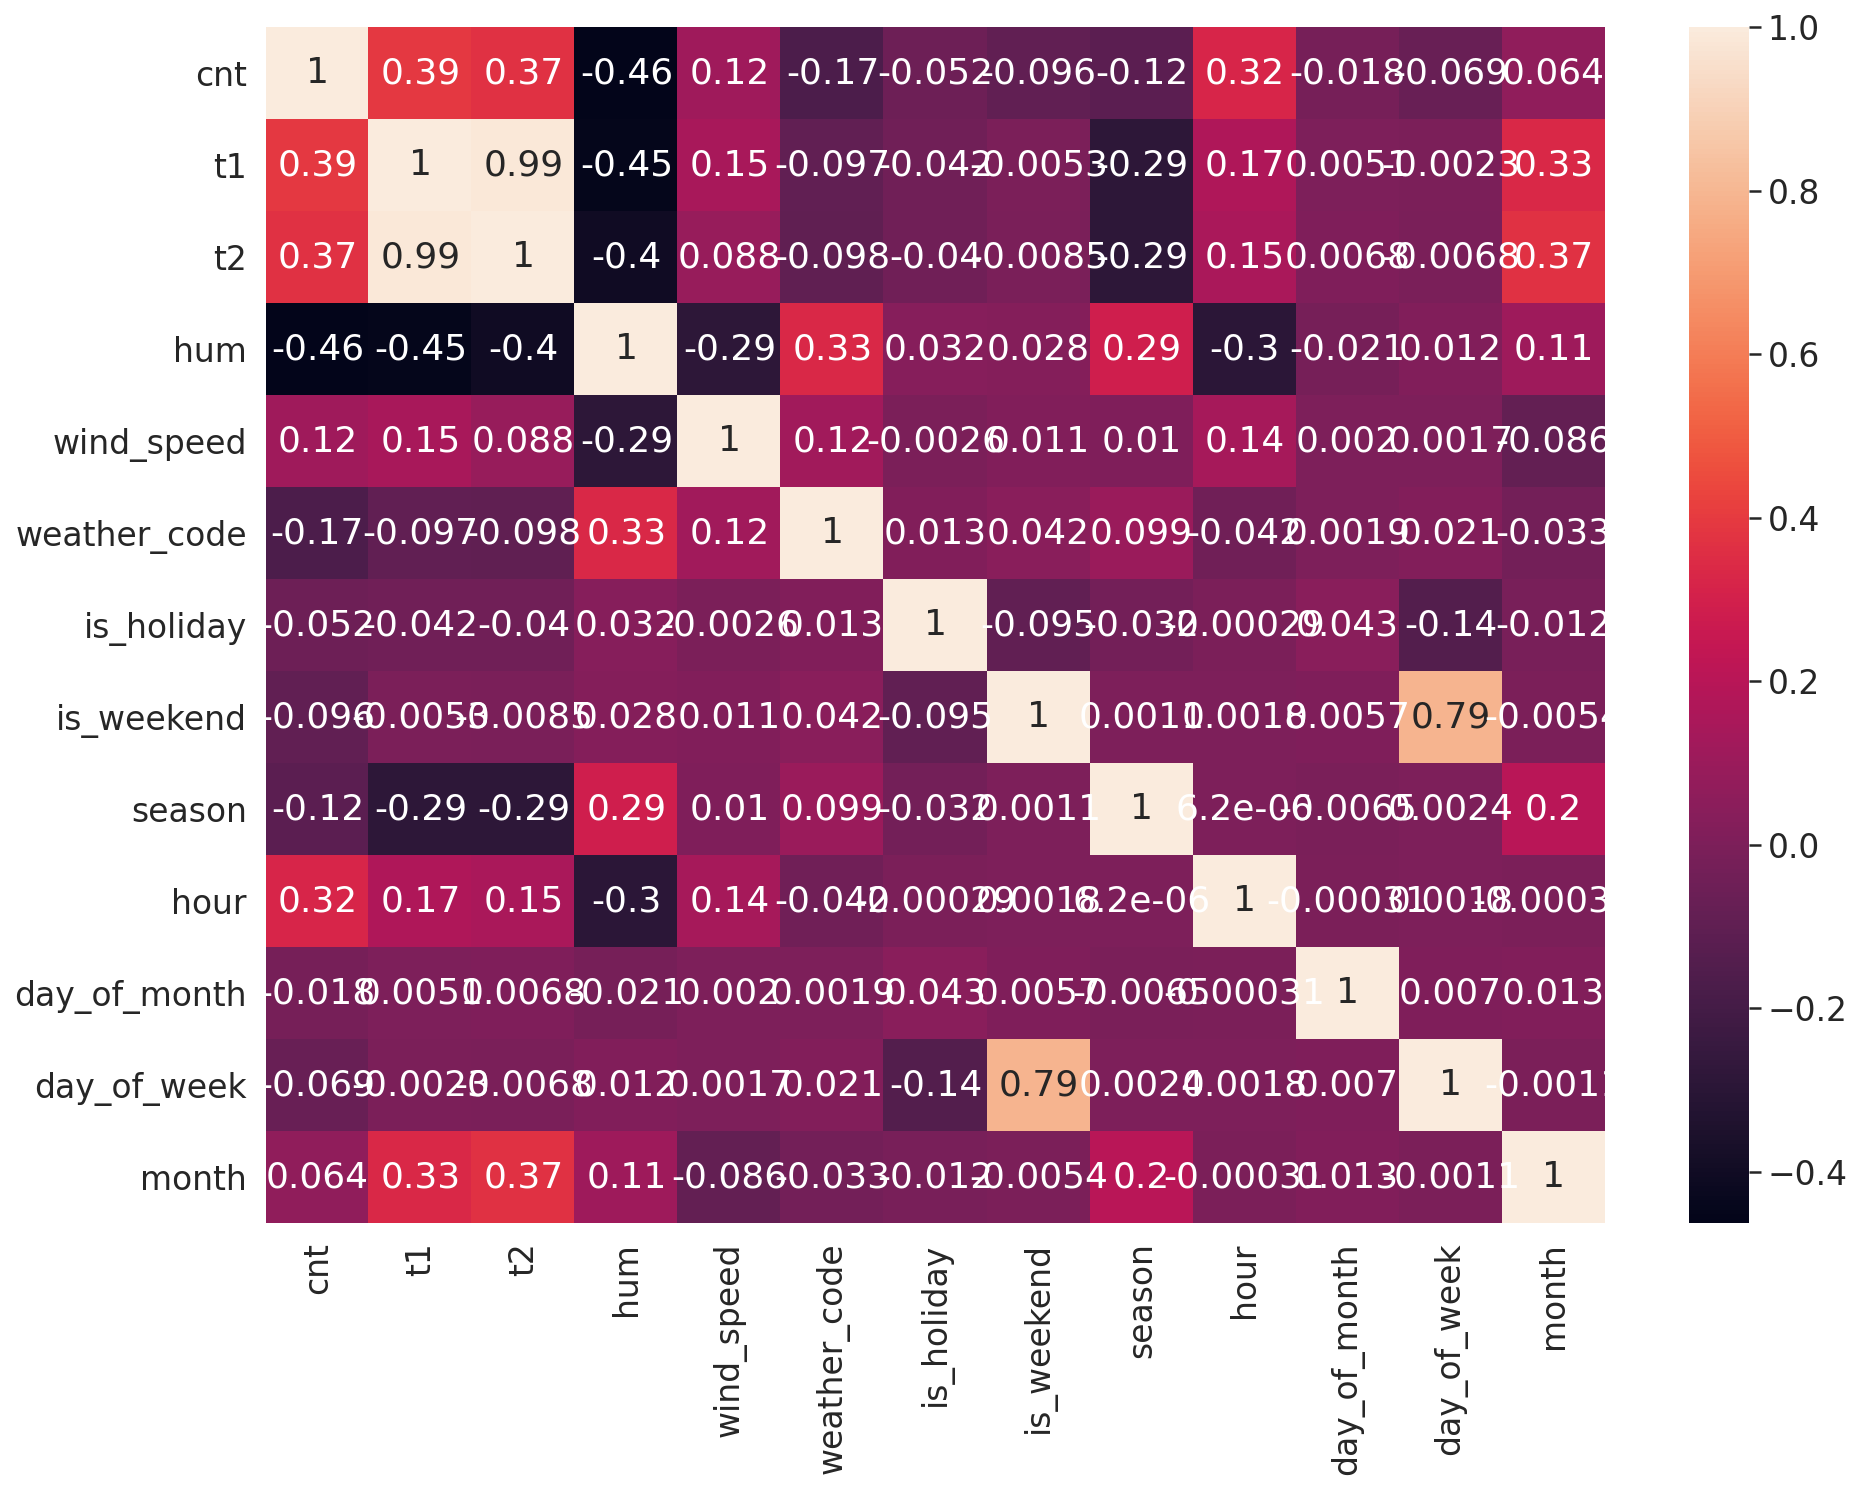

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
col

{'cnt': 'the count of a new bike shares',
 'hum': 'humidity in percentage',
 'is_holiday': 'boolean field - 1 holiday / 0 non holiday',
 'is_weekend': 'boolean field - 1 if the day is weekend',
 'season': 'category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.',
 't1': 'real temperature in C',
 't2': 'temperature in C “feels like”',
 'timestamp': 'timestamp field for grouping the data',
 'weather_code': 'category of the weather',
 'wind_speed': 'wind speed in km/h'}

---
---

## 2. Data Pre-Processing


### Train - Test Split

Appropriately split the data for optimum training.

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [ ]:
df.head(1)

cnt   t1   t2   hum  ...  hour  day_of_month  day_of_week  month
timestamp                        ...                                        
2015-01-04  182  3.0  2.0  93.0  ...     0             4            6      1

[1 rows x 13 columns]

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1', 't2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [ ]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'hour', 'day_of_month', 'day_of_week', 'month'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [ ]:

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






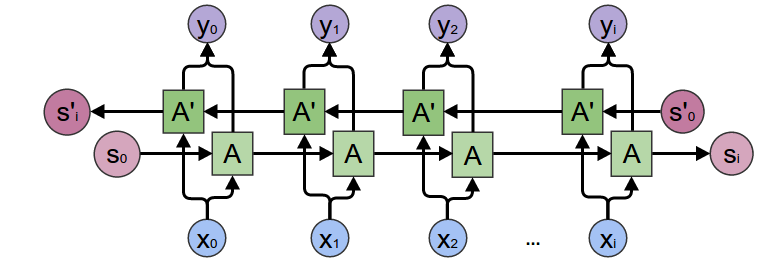

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

### Plot Train and Validation Losses

In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 5)

In [ ]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
   validation_split=0.1,
    shuffle=False,
    callbacks = [early_stop]
)

Epoch 1/30
441/441 [==============================] - 12s 19ms/step - loss: 0.4670 - val_loss: 0.1255
Epoch 2/30
441/441 [==============================] - 7s 17ms/step - loss: 0.0972 - val_loss: 0.0661
Epoch 3/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0548 - val_loss: 0.0549
Epoch 4/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0425 - val_loss: 0.0356
Epoch 5/30
441/441 [==============================] - 7s 15ms/step - loss: 0.0318 - val_loss: 0.0309
Epoch 6/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0270 - val_loss: 0.0314
Epoch 7/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0291 - val_loss: 0.0318
Epoch 8/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0242 - val_loss: 0.0321
Epoch 9/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0223 - val_loss: 0.0324
Epoch 10/30
441/441 [==============================] - 7s 16ms/step - loss: 0.0210 - val_l

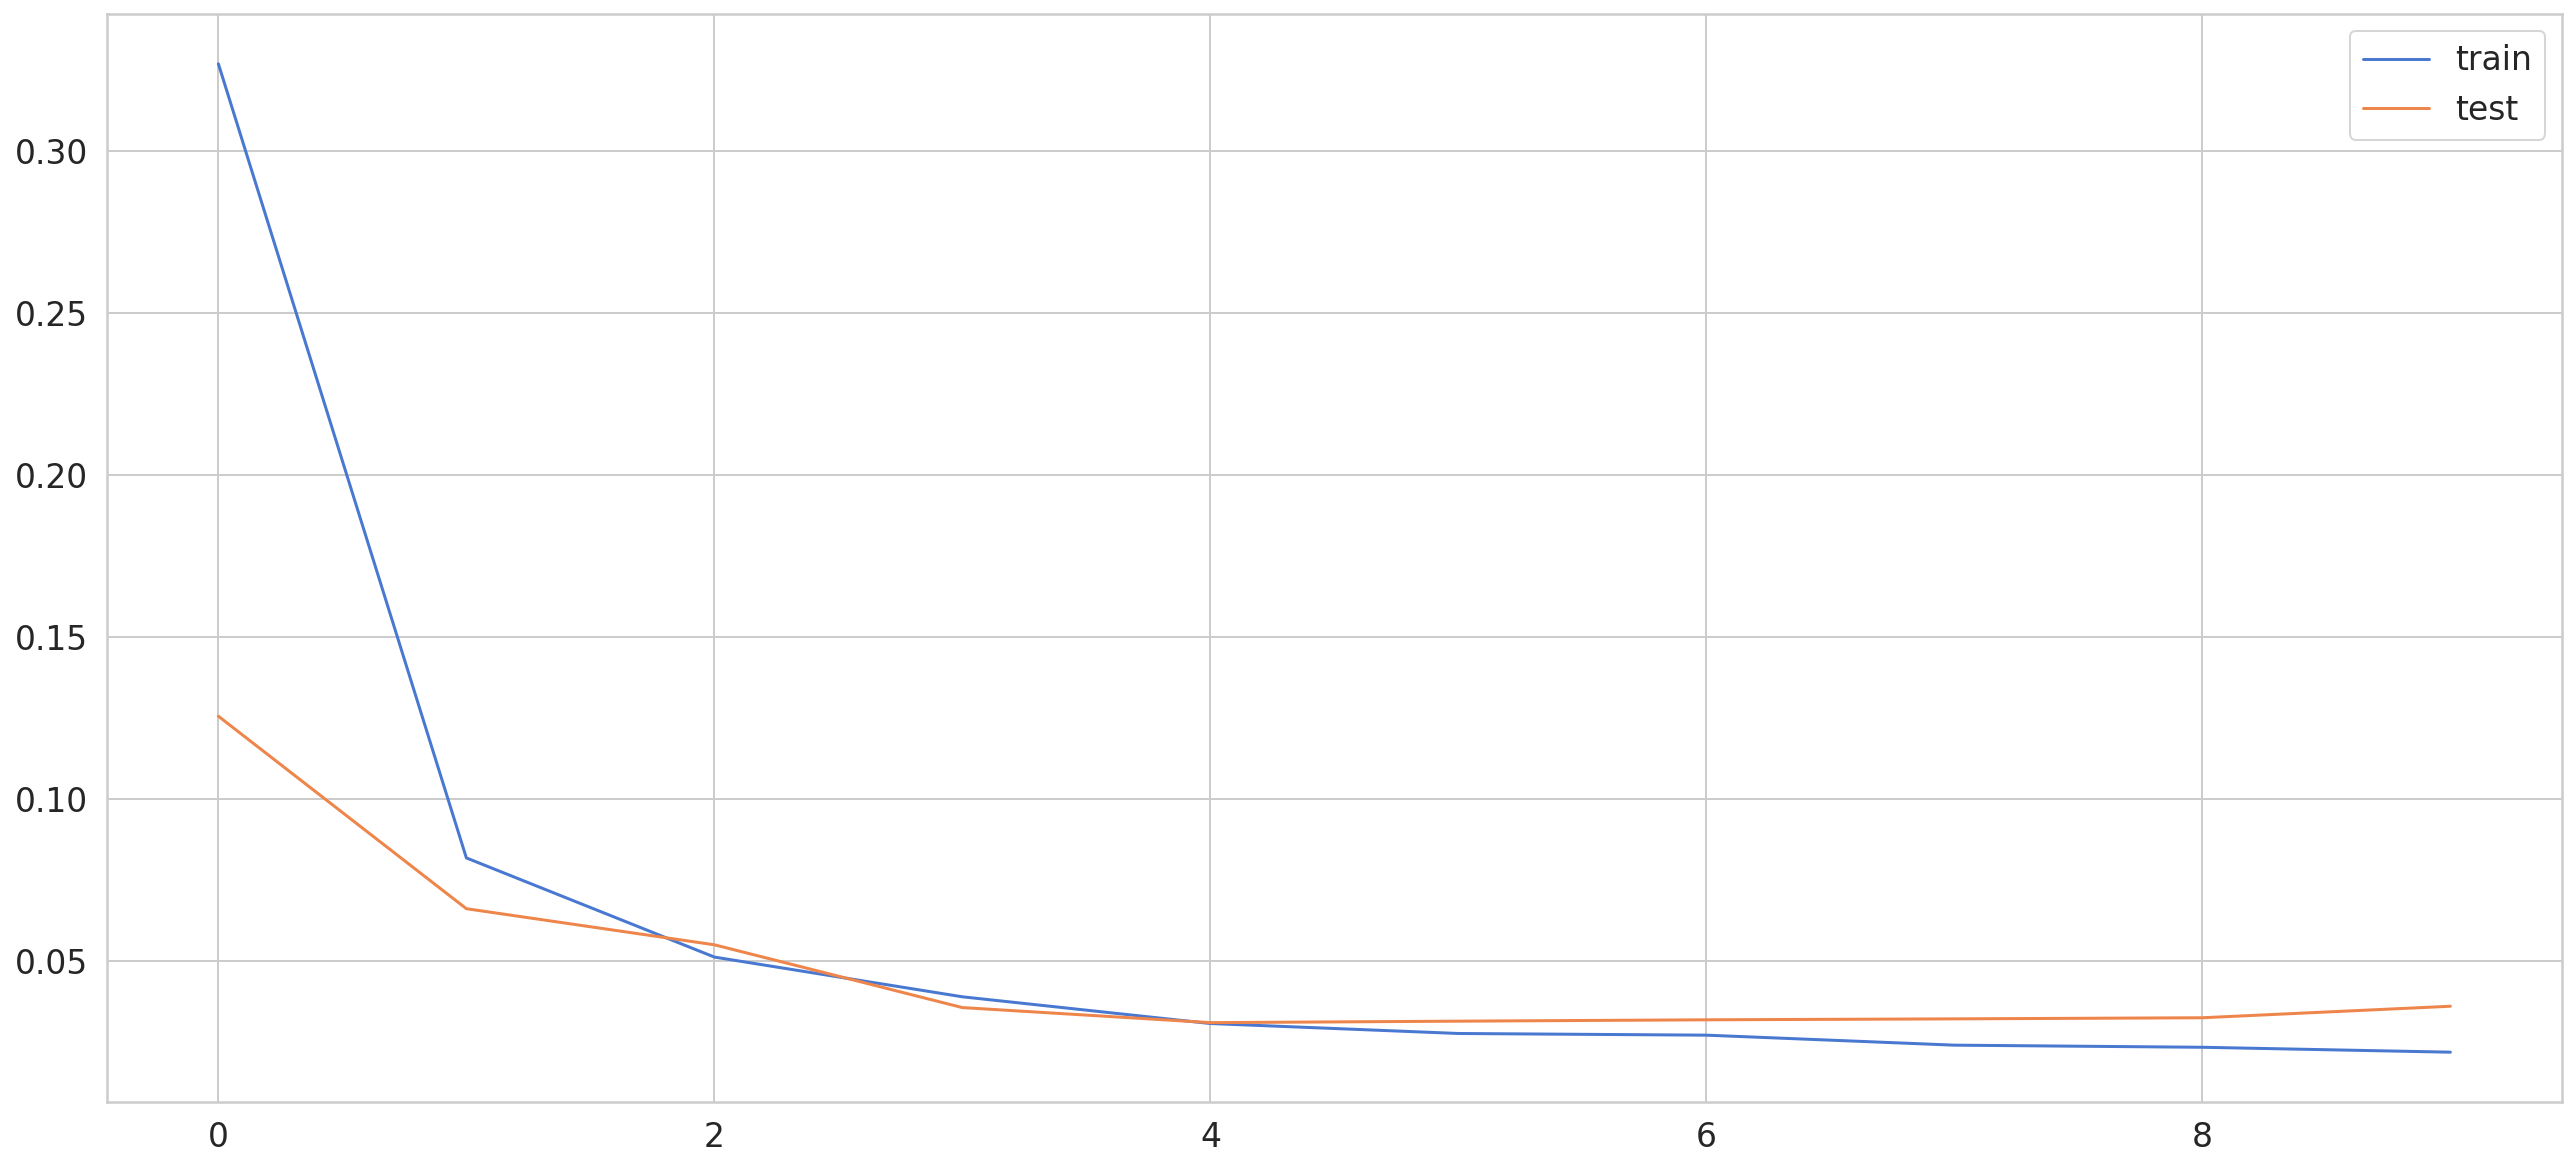

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 0.45171195],
       [ 0.16361593],
       [-0.11743595],
       ...,
       [-0.17652917],
       [-0.2888354 ],
       [-0.3700635 ]], dtype=float32)

---
---

## 4. Demand Predictions

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

### Inverse Transform

In [ ]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [ ]:
y_pred_inv

array([[1512.8857],
       [1094.5703],
       [ 686.483 ],
       ...,
       [ 600.6797],
       [ 437.611 ],
       [ 319.6678]], dtype=float32)

### Plot Prediction

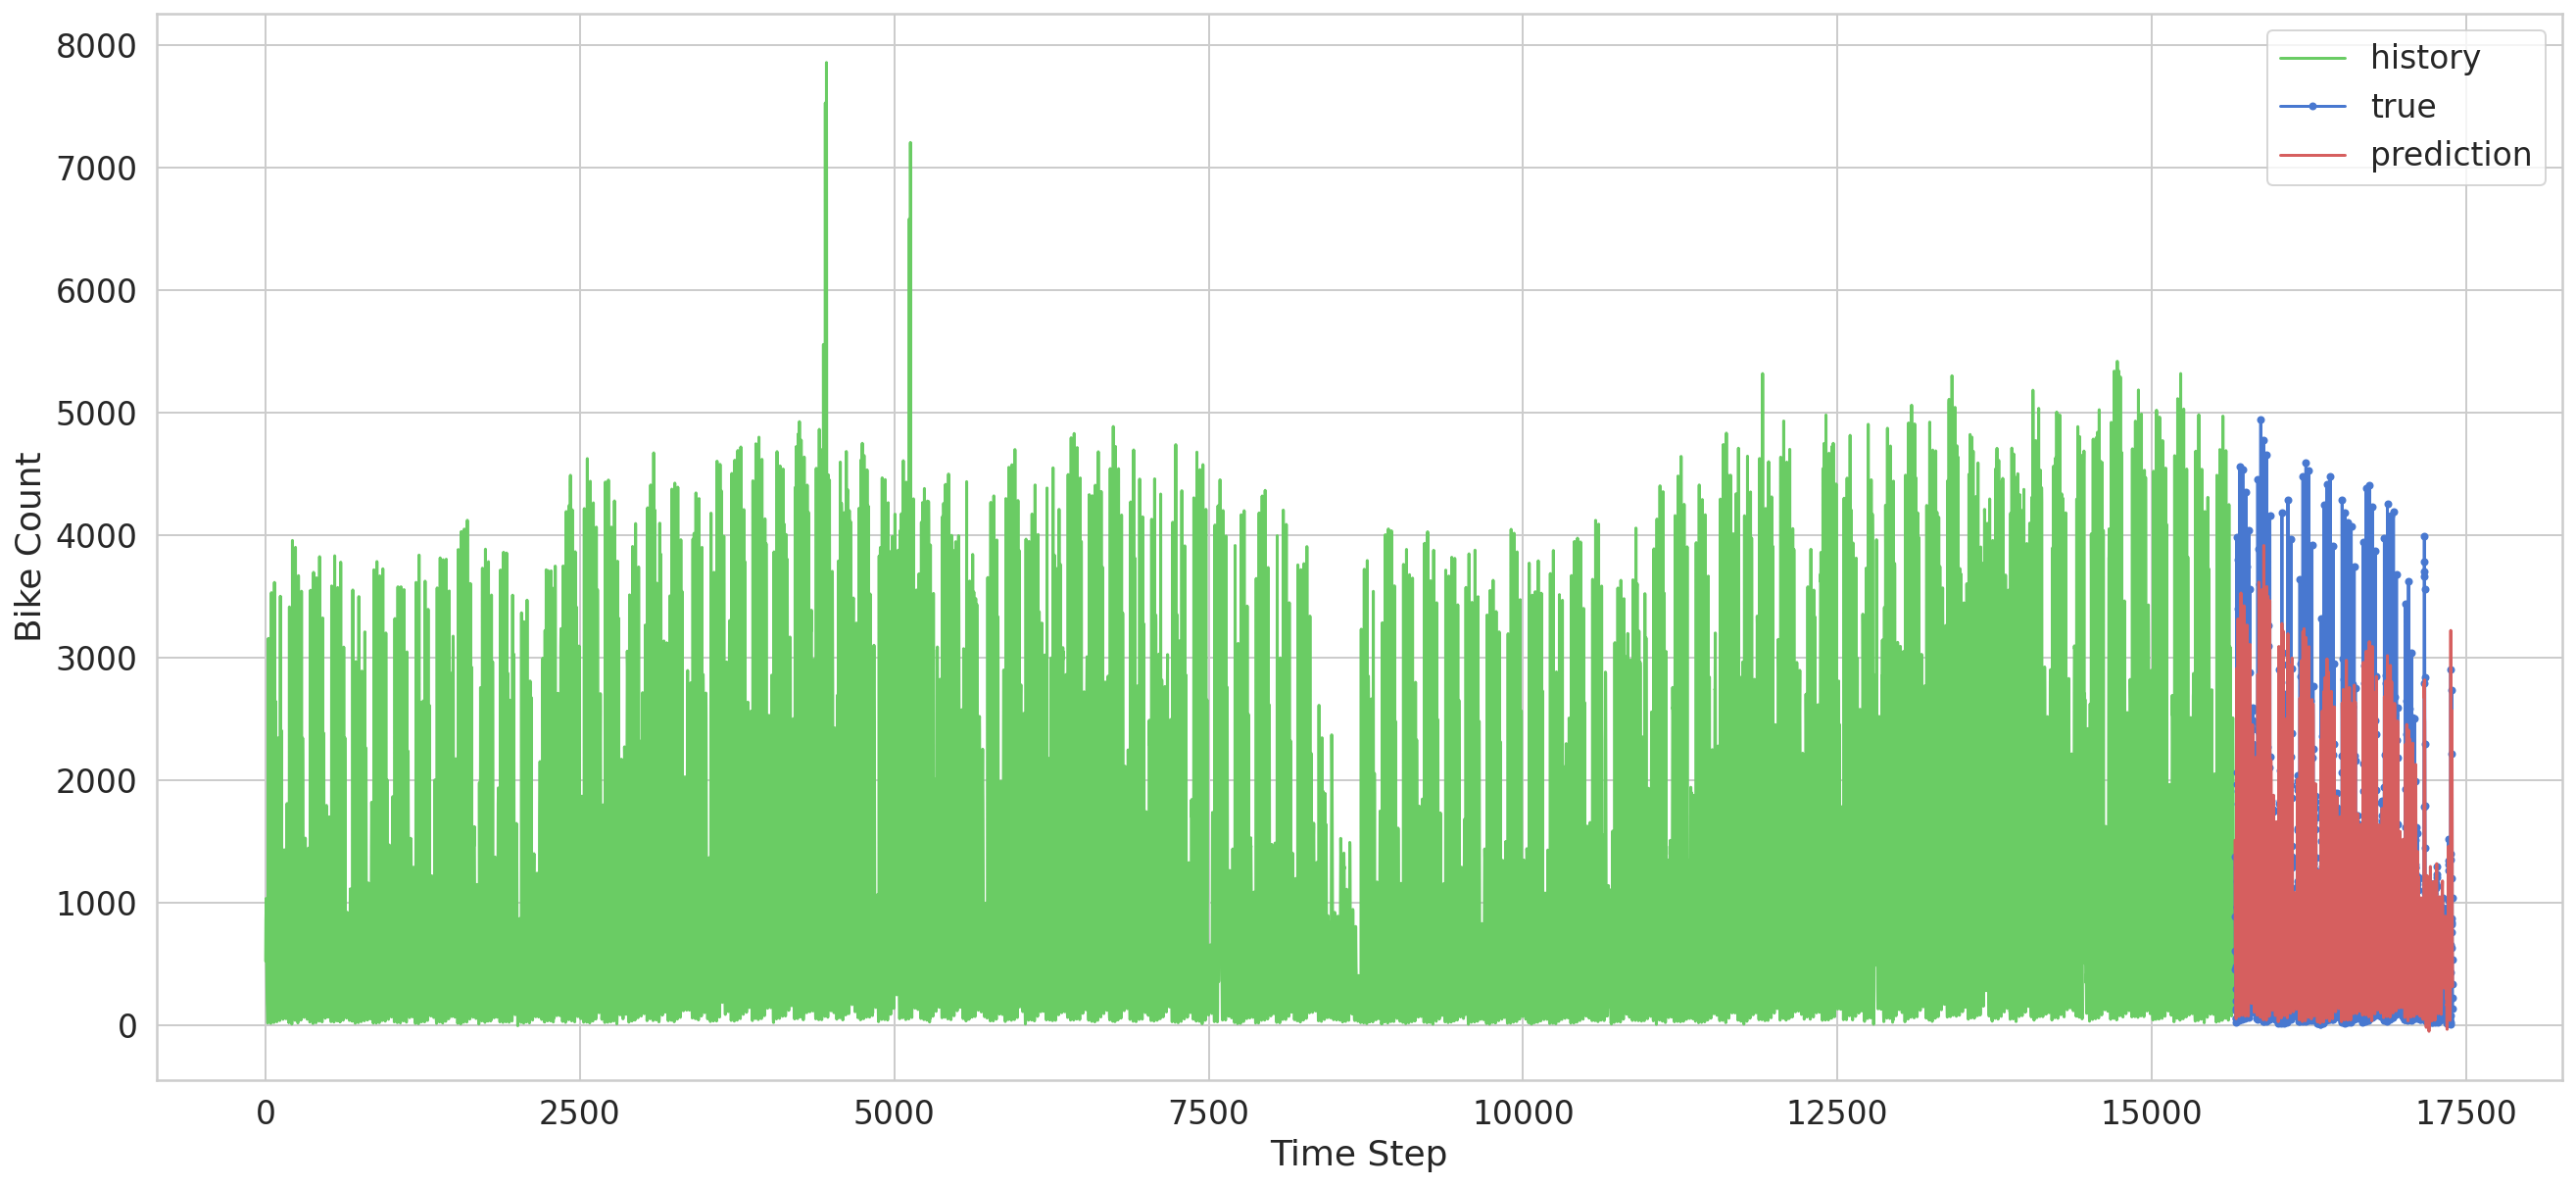

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Calculate Train and Test Error Scores

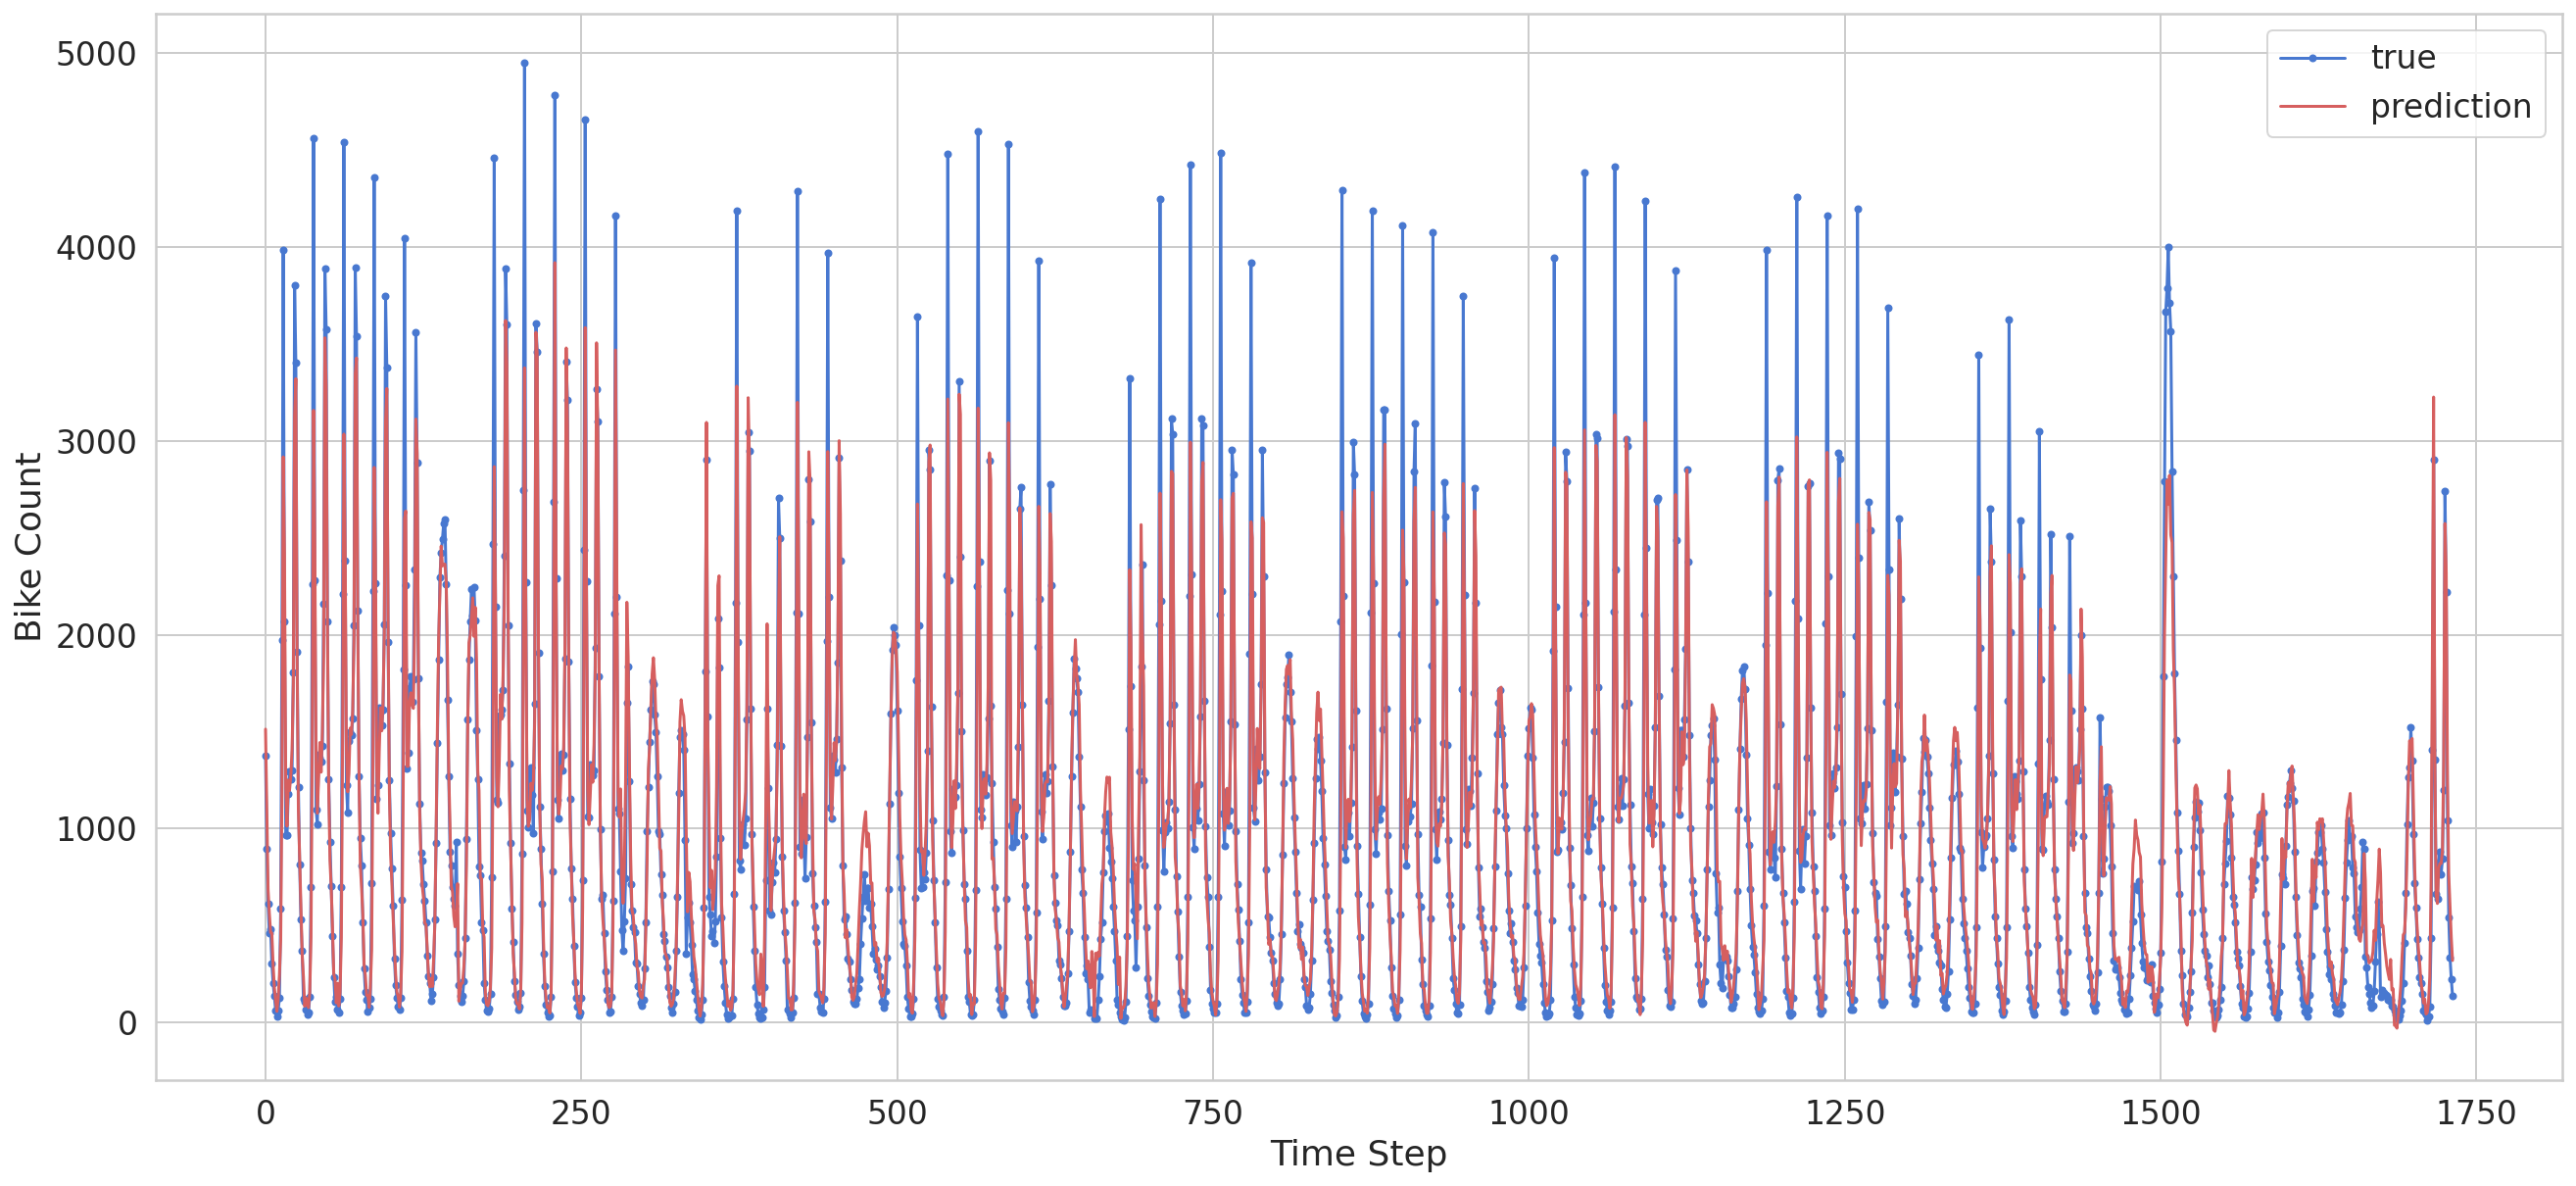

In [ ]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
test

cnt      t1  ...  day_of_week  month
timestamp                              ...                    
2016-10-23 08:00:00 -0.370523 -0.6250  ...            6     10
2016-10-23 09:00:00 -0.077824 -0.4375  ...            6     10
2016-10-23 10:00:00  0.345730 -0.3125  ...            6     10
2016-10-23 11:00:00  0.718320 -0.1250  ...            6     10
2016-10-23 12:00:00  0.901515 -0.1250  ...            6     10
...                       ...     ...  ...          ...    ...
2017-01-03 19:00:00  0.127410 -1.0000  ...            1      1
2017-01-03 20:00:00 -0.217631 -1.0000  ...            1      1
2017-01-03 21:00:00 -0.358127 -0.9375  ...            1      1
2017-01-03 22:00:00 -0.435950 -0.9375  ...            1      1
2017-01-03 23:00:00 -0.494490 -1.0000  ...            1      1

[1742 rows x 13 columns]

In [ ]:
actual= pd.DataFrame(y_test_inv.reshape(-1,1),columns=['actual'])
prediction = pd.DataFrame(y_pred_inv,columns=['prediction'])

In [ ]:
actual

actual
0     1376.0
1      894.0
2      615.0
3      462.0
4      481.0
...      ...
1727  1042.0
1728   541.0
1729   337.0
1730   224.0
1731   139.0

[1732 rows x 1 columns]

In [ ]:
prediction

prediction
0     1512.885742
1     1094.570312
2      686.482971
3      563.410156
4      464.118622
...           ...
1727  1251.354004
1728   763.858521
1729   600.679688
1730   437.610992
1731   319.667786

[1732 rows x 1 columns]

In [ ]:
result =pd.concat([actual,prediction],axis=1).set_index(test.iloc[10:,:].index)
result

actual   prediction
timestamp                               
2016-10-23 18:00:00  1376.0  1512.885742
2016-10-23 19:00:00   894.0  1094.570312
2016-10-23 20:00:00   615.0   686.482971
2016-10-23 21:00:00   462.0   563.410156
2016-10-23 22:00:00   481.0   464.118622
...                     ...          ...
2017-01-03 19:00:00  1042.0  1251.354004
2017-01-03 20:00:00   541.0   763.858521
2017-01-03 21:00:00   337.0   600.679688
2017-01-03 22:00:00   224.0   437.610992
2017-01-03 23:00:00   139.0   319.667786

[1732 rows x 2 columns]

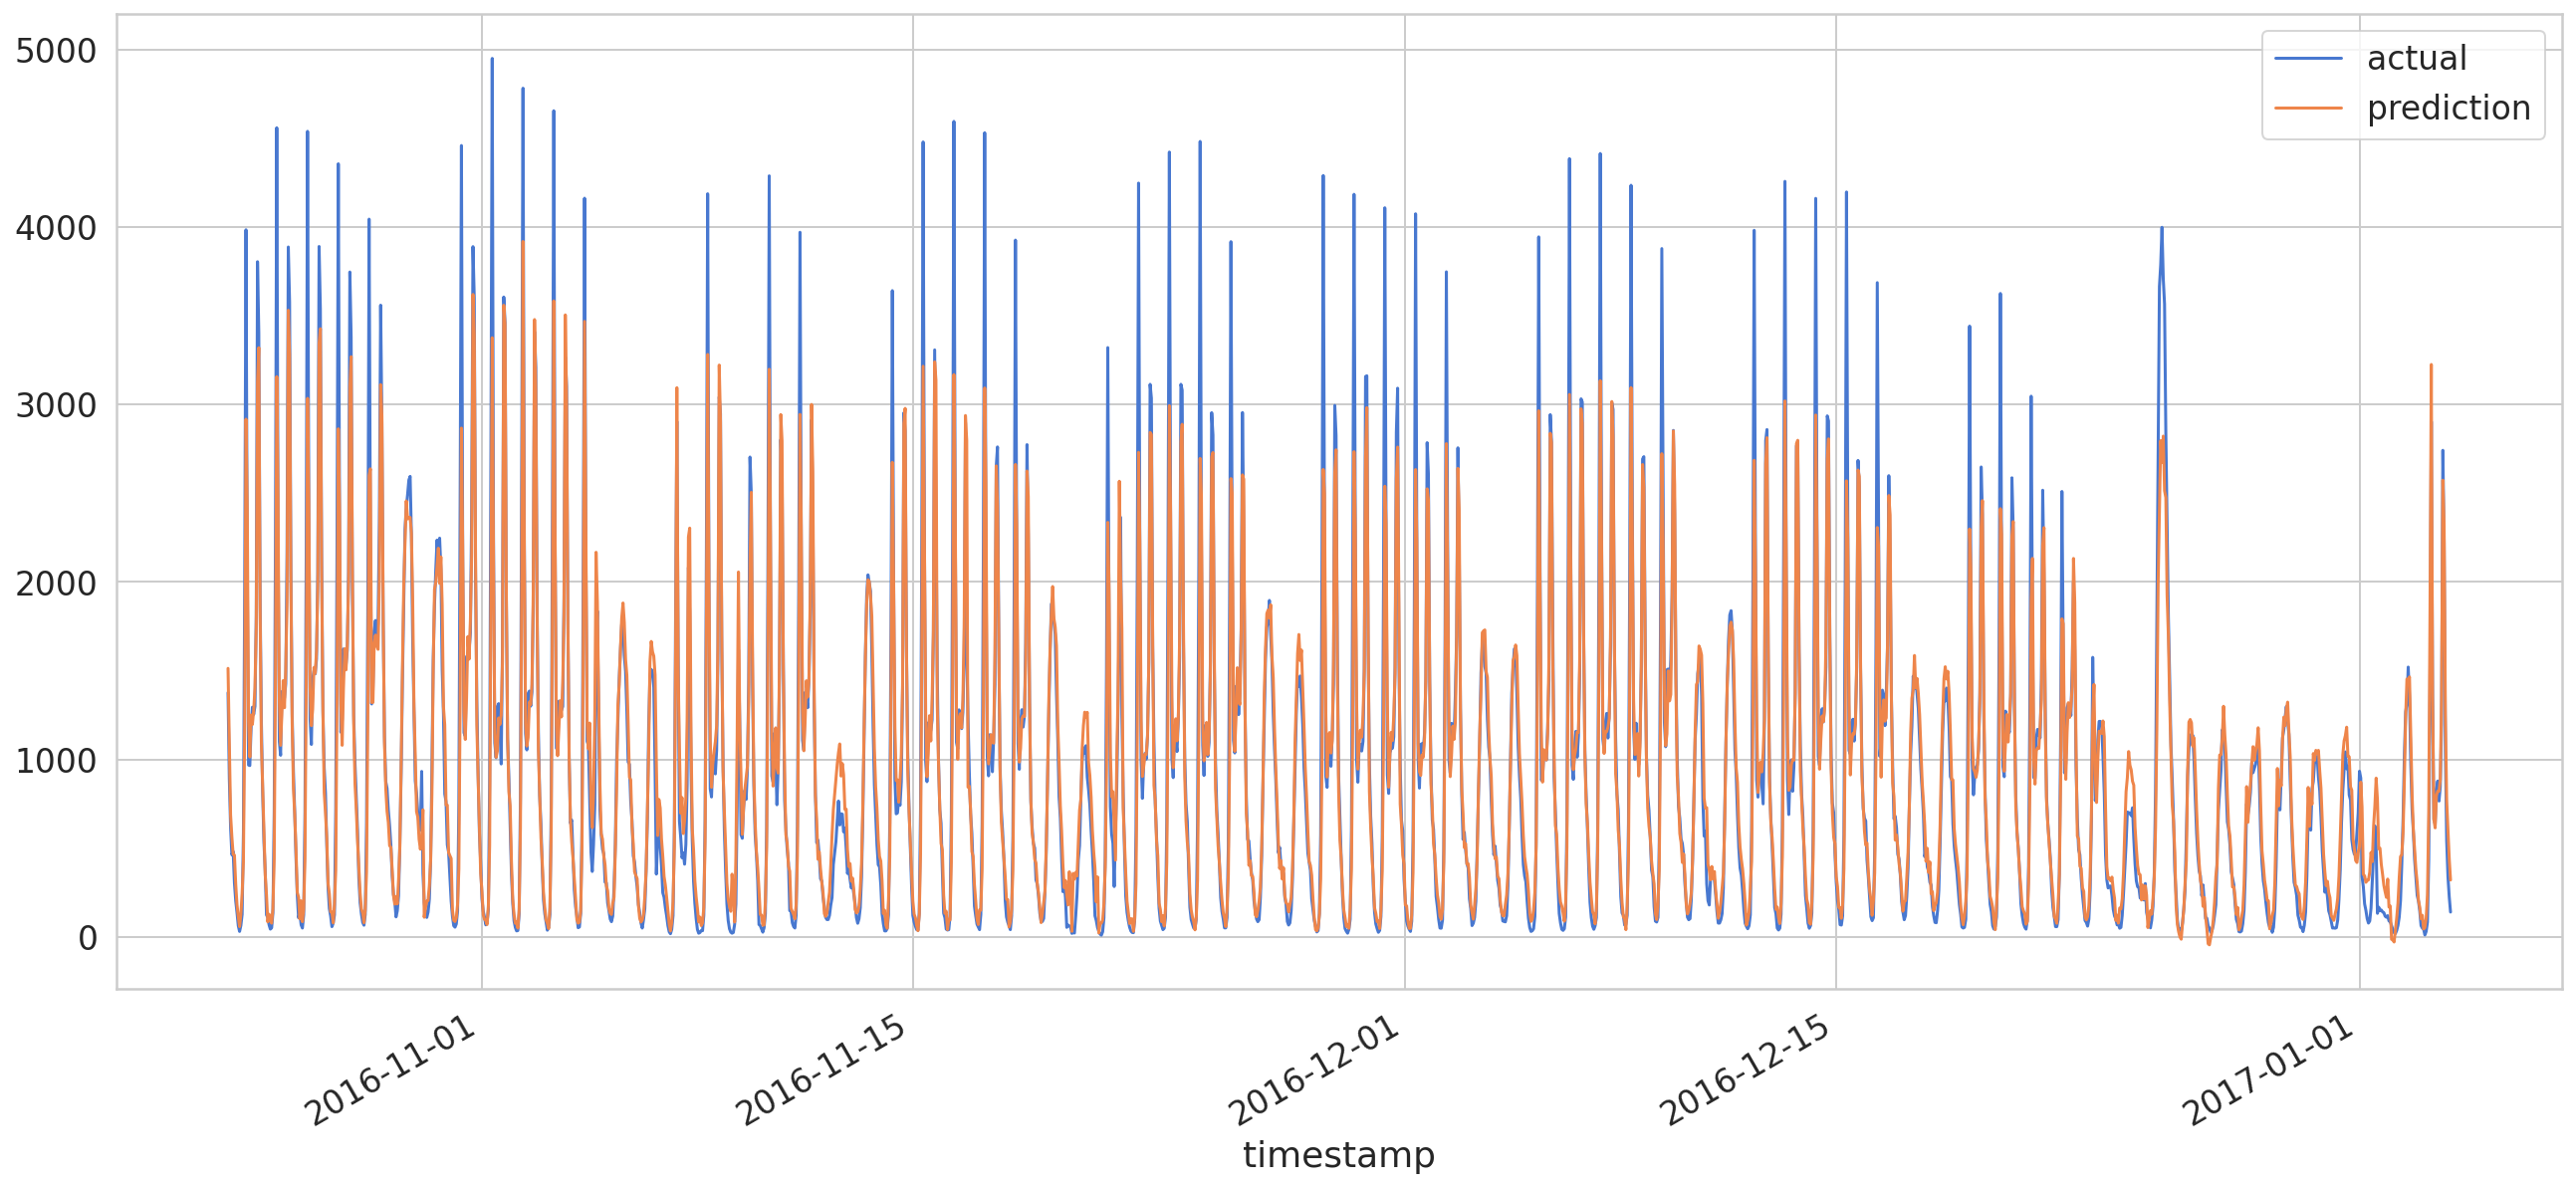

In [ ]:
result.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
mean_absolute_error(y_test_inv.flatten(),y_pred_inv.flatten())

150.05536593465828

In [ ]:

np.sqrt(mean_squared_error(y_test_inv.flatten(),y_pred_inv.flatten()))

277.3891818996825

In [ ]:
explained_variance_score(y_test_inv.flatten(),y_pred_inv.flatten())


0.9108611975581875

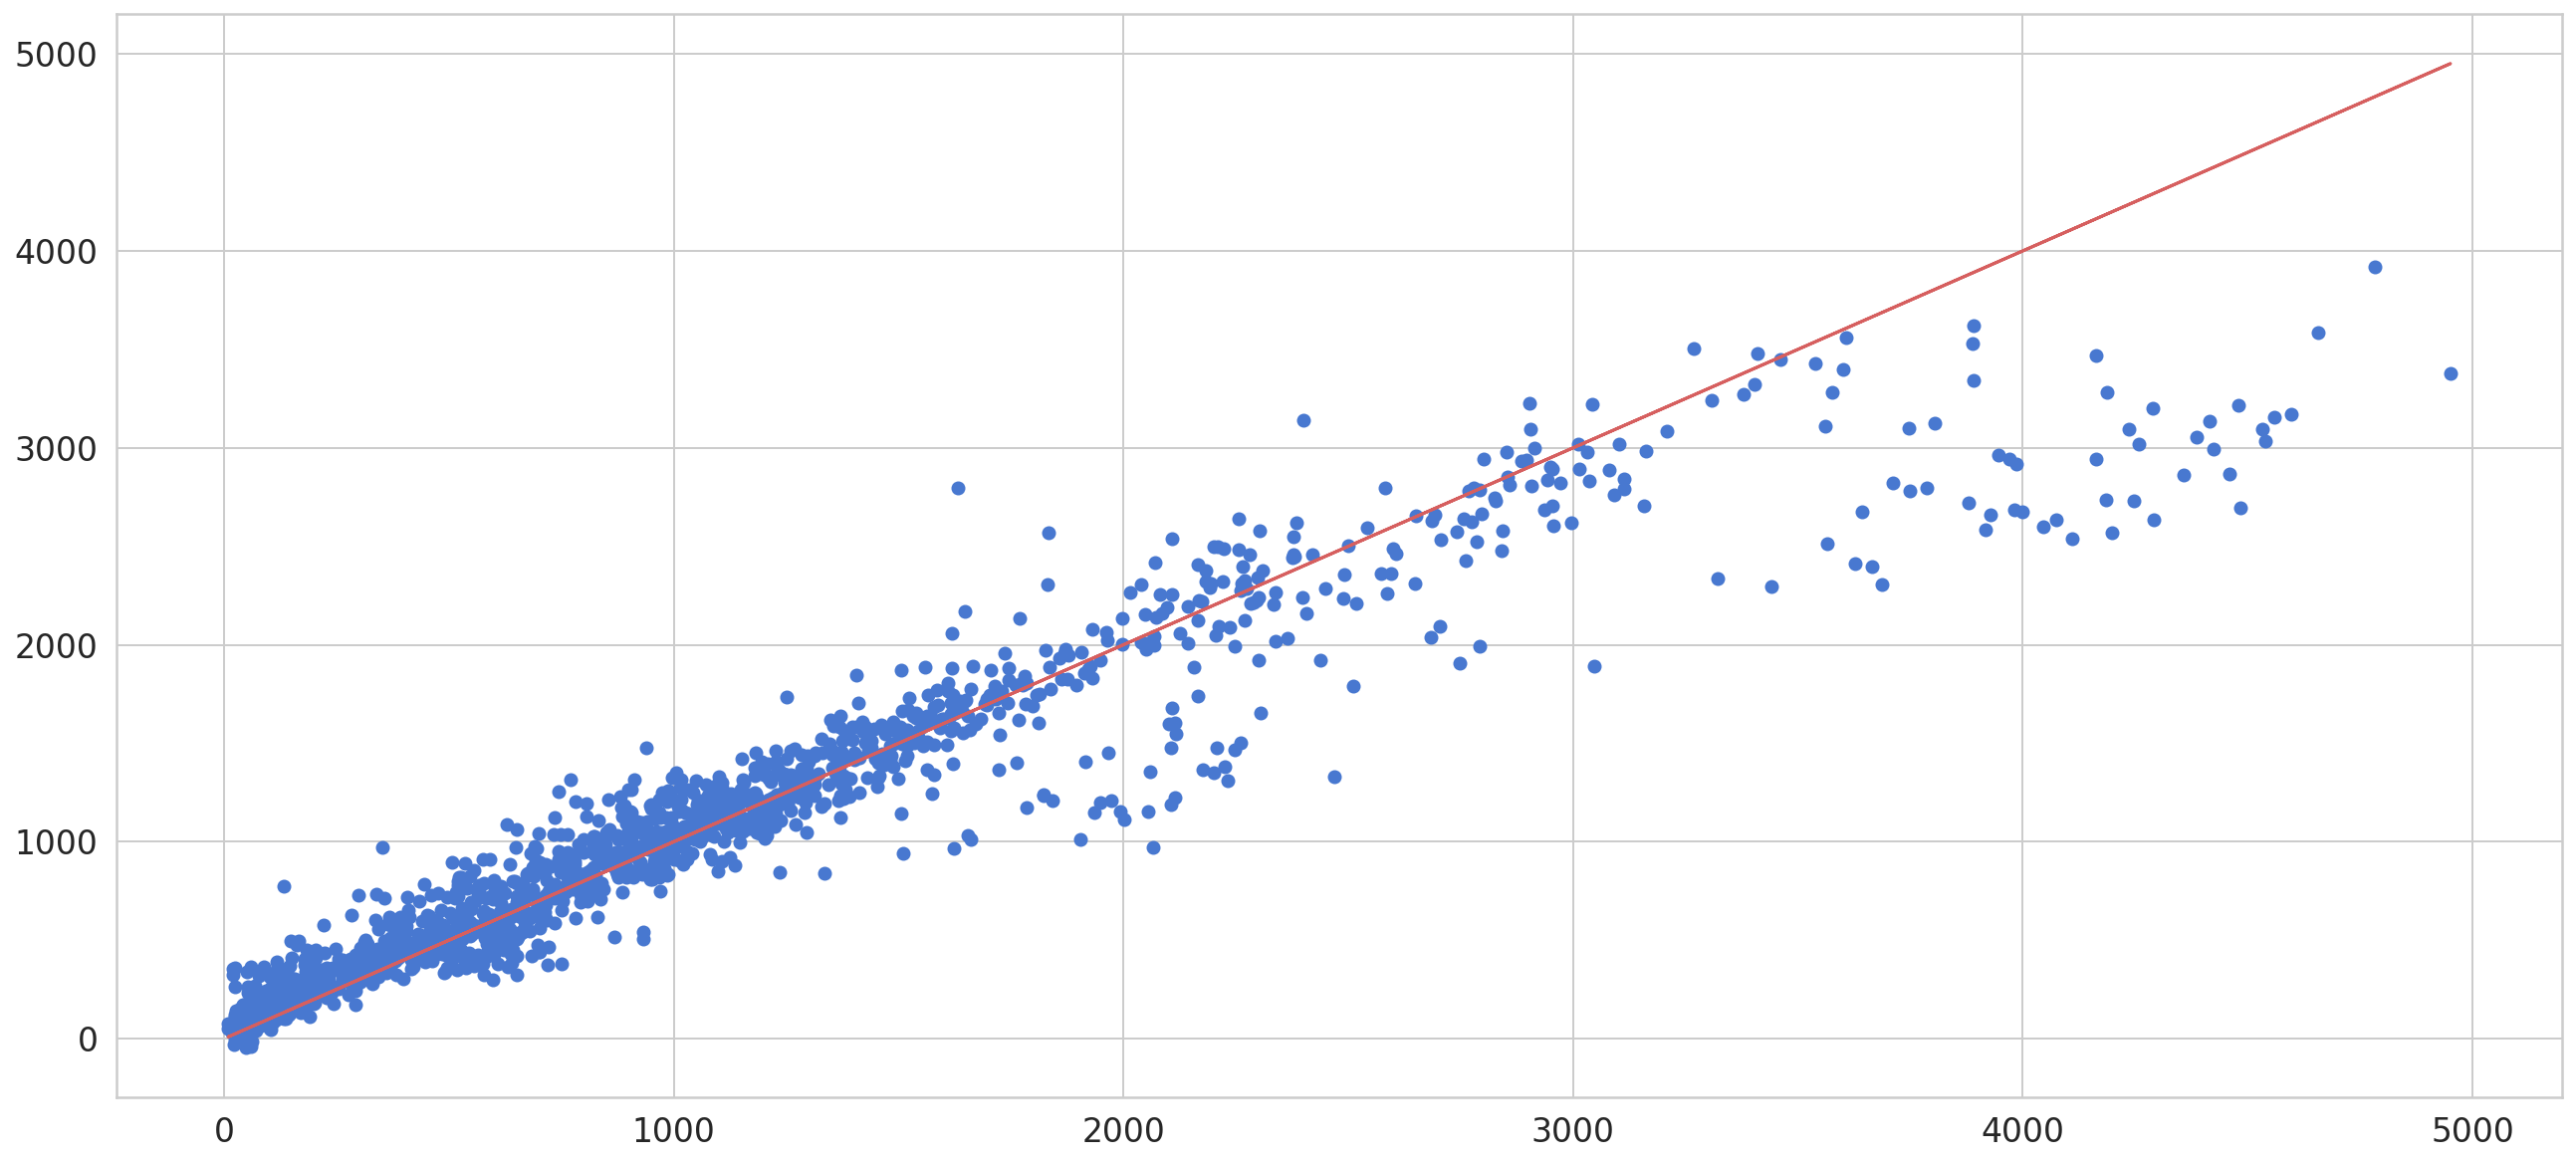

In [ ]:
plt.scatter(y_test_inv.flatten(),y_pred_inv.flatten())
plt.plot(y_test_inv.flatten(),y_test_inv.flatten(),'r')
